# 3 . EDA - Customer Retention

## Import libraries

In [1]:
# import library
import numpy as np 
import pandas as pd 
import datetime as dt

#For Data  Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import ydata_profiling
%matplotlib inline 


#For Machine Learning Algorithm
from sklearn.preprocessing import StandardScaler

## Ignore warning
import warnings
warnings.filterwarnings("ignore")


C:\Users\lehai\AppData\Local\Temp\ipykernel_26064\866748602.py:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df=pd.read_csv('final_data_merge.csv')
df

order_id                customer_unique_id  \
0      00e7ee1b050b8499577073aeb2a297a1  861eff4711a542e4b93843c6dd7febb0   
1      c1d2b34febe9cd269e378117d6681172  9eae34bbd3a474ec5d07949ca7de67c0   
2      c1d2b34febe9cd269e378117d6681172  9eae34bbd3a474ec5d07949ca7de67c0   
3      b1a5d5365d330d10485e0203d54ab9e8  3c799d181c34d51f6d44bbbc563024db   
4      574fe1739f65af76badd0999db300b4f  567ab47ca4deb92d46dbf54dce07d0a7   
...                                 ...                               ...   
44938  d3782eb2976abf986175941c51364aab  94431ab24129f0060b53a89cfd62462f   
44939  14983a8e9fbbb6ec172cbfcdc13aa291  d870a06834e68bdc8864f3a9a97e73ec   
44940  4fc1ab1684475d151043e9bcb3e3a0eb  5b16e124fa622d31637c864d2e343e4a   
44941  b0f3b60e4ef21a14515d0e51782a7580  ff3ae96c88f8dfaeffdbd0af958d8dff   
44942  b7349b2c8b3b8105cb58b4c65602206e  e2d8ec127c1e5b6382445919f862da5c   

      order_purchase_timestamp                        product_id  \
0          2017-05-16 15:05:35  a9516a079e37a9c9c36b9b78b10169e8   
1          2017-11-09 00:50:13  a9516a079e37a9c9c36b9b78b10169e8   
2          2017-11-09 00:50:13  a9516a079e37a9c9c36b9b78b10169e8   
3          2017-05-07 20:11:26  a9516a079e37a9c9c36b9b78b10169e8   
4          2017-03-23 15:10:17  a9516a079e37a9c9c36b9b78b10169e8   
...                        ...                               ...   
44938      2017-12-06 21:38:12  197f7d1d3a8b0bf0c8f0394ff71b574b   
44939      2017-12-29 13:11:06  197f7d1d3a8b0bf0c8f0394ff71b574b   
44940      2017-06-30 10:13:23  17ec1cf6dc8dc7557ca34f1d64a93dc7   
44941      2017-08-13 22:11:21  31240eaae01b43247d878f3e89996e35   
44942      2017-08-11 10:10:03  63682d69d8d74bacf75360f6efb31fcb   

       order_item_id                       product_category   price  \
0                  1                       office_furniture  124.99   
1                  1                       office_furniture  112.99   
2                  2                       office_furniture  112.99   
3                  1                       office_furniture  124.99   
4                  1                       office_furniture  126.99   
...              ...                                    ...     ...   
44938              2              construction_tools_lights   88.00   
44939              2              construction_tools_lights   88.00   
44940              1  small_appliances_home_oven_and_coffee   71.90   
44941              1  small_appliances_home_oven_and_coffee   21.90   
44942              1  small_appliances_home_oven_and_coffee   87.16   

       freight_value  total_amount  review_score    customer_city  \
0              21.88        146.87             4           franca   
1              24.90        137.89             1         santarem   
2              24.90        137.89             1         santarem   
3              15.62        140.61             3  nova santa rita   
4              15.06        142.05             4         angelina   
...              ...           ...           ...              ...   
44938          10.55         98.55             5          dracena   
44939          19.91        107.91             3        nilopolis   
44940          16.75         88.65             5   belo horizonte   
44941          11.85         33.75             3           suzano   
44942          12.95        100.11             1        sao paulo   

      customer_state  
0                 SP  
1                 PA  
2                 PA  
3                 RS  
4                 SC  
...              ...  
44938             SP  
44939             RJ  
44940             MG  
44941             SP  
44942             SP  

[44943 rows x 12 columns]

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44943 entries, 0 to 44942
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  44943 non-null  object 
 1   customer_unique_id        44943 non-null  object 
 2   order_purchase_timestamp  44943 non-null  object 
 3   product_id                44943 non-null  object 
 4   order_item_id             44943 non-null  int64  
 5   product_category          44943 non-null  object 
 6   price                     44943 non-null  float64
 7   freight_value             44943 non-null  float64
 8   total_amount              44943 non-null  float64
 9   review_score              44943 non-null  int64  
 10  customer_city             44943 non-null  object 
 11  customer_state            44943 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 4.1+ MB


In [4]:
# Change datatype of the column order_purchase_timestamp (object) to datetime

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')

### Overview 

In [5]:
# import pandas_profiling as pp
report= ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Make Cohort Analysis and Customer Behavior

In [6]:
# Function to extact month from order_purchase_timestamp
def extract_month(x) : 
    month_ = dt.datetime(x.year,x.month,1)
    return month_

# Create columns Order_Month : date of the order
df['order_month'] = df['order_purchase_timestamp'].apply(extract_month)

In [7]:
# Create columns CohorMonth: the date of  custome's first order
grouping = df.groupby('customer_unique_id')['order_month']
df['CohortMonth'] = grouping.transform('min')
df.tail()

order_id                customer_unique_id  \
44938  d3782eb2976abf986175941c51364aab  94431ab24129f0060b53a89cfd62462f   
44939  14983a8e9fbbb6ec172cbfcdc13aa291  d870a06834e68bdc8864f3a9a97e73ec   
44940  4fc1ab1684475d151043e9bcb3e3a0eb  5b16e124fa622d31637c864d2e343e4a   
44941  b0f3b60e4ef21a14515d0e51782a7580  ff3ae96c88f8dfaeffdbd0af958d8dff   
44942  b7349b2c8b3b8105cb58b4c65602206e  e2d8ec127c1e5b6382445919f862da5c   

      order_purchase_timestamp                        product_id  \
44938      2017-12-06 21:38:12  197f7d1d3a8b0bf0c8f0394ff71b574b   
44939      2017-12-29 13:11:06  197f7d1d3a8b0bf0c8f0394ff71b574b   
44940      2017-06-30 10:13:23  17ec1cf6dc8dc7557ca34f1d64a93dc7   
44941      2017-08-13 22:11:21  31240eaae01b43247d878f3e89996e35   
44942      2017-08-11 10:10:03  63682d69d8d74bacf75360f6efb31fcb   

       order_item_id                       product_category  price  \
44938              2              construction_tools_lights  88.00   
44939              2              construction_tools_lights  88.00   
44940              1  small_appliances_home_oven_and_coffee  71.90   
44941              1  small_appliances_home_oven_and_coffee  21.90   
44942              1  small_appliances_home_oven_and_coffee  87.16   

       freight_value  total_amount  review_score   customer_city  \
44938          10.55         98.55             5         dracena   
44939          19.91        107.91             3       nilopolis   
44940          16.75         88.65             5  belo horizonte   
44941          11.85         33.75             3          suzano   
44942          12.95        100.11             1       sao paulo   

      customer_state order_month CohortMonth  
44938             SP  2017-12-01  2017-12-01  
44939             RJ  2017-12-01  2017-12-01  
44940             MG  2017-06-01  2017-06-01  
44941             SP  2017-08-01  2017-08-01  
44942             SP  2017-08-01  2017-08-01

In [8]:
# Create column CohortIndex: the number of months that have elapsed since the customer's first order
def extract_month_int(data,column):
    year_ = data[column].dt.year
    month_ = data[column].dt.month
    day_ = data[column].dt.day
    return year_, month_, day_

invoice_year,invoice_month,_ = extract_month_int(df,'order_month')
cohort_year,cohort_month,_ = extract_month_int(df,'CohortMonth')

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

df['CohortIndex'] = year_diff * 12 + month_diff + 1 

In [9]:
df.head()

order_id                customer_unique_id  \
0  00e7ee1b050b8499577073aeb2a297a1  861eff4711a542e4b93843c6dd7febb0   
1  c1d2b34febe9cd269e378117d6681172  9eae34bbd3a474ec5d07949ca7de67c0   
2  c1d2b34febe9cd269e378117d6681172  9eae34bbd3a474ec5d07949ca7de67c0   
3  b1a5d5365d330d10485e0203d54ab9e8  3c799d181c34d51f6d44bbbc563024db   
4  574fe1739f65af76badd0999db300b4f  567ab47ca4deb92d46dbf54dce07d0a7   

  order_purchase_timestamp                        product_id  order_item_id  \
0      2017-05-16 15:05:35  a9516a079e37a9c9c36b9b78b10169e8              1   
1      2017-11-09 00:50:13  a9516a079e37a9c9c36b9b78b10169e8              1   
2      2017-11-09 00:50:13  a9516a079e37a9c9c36b9b78b10169e8              2   
3      2017-05-07 20:11:26  a9516a079e37a9c9c36b9b78b10169e8              1   
4      2017-03-23 15:10:17  a9516a079e37a9c9c36b9b78b10169e8              1   

   product_category   price  freight_value  total_amount  review_score  \
0  office_furniture  124.99          21.88        146.87             4   
1  office_furniture  112.99          24.90        137.89             1   
2  office_furniture  112.99          24.90        137.89             1   
3  office_furniture  124.99          15.62        140.61             3   
4  office_furniture  126.99          15.06        142.05             4   

     customer_city customer_state order_month CohortMonth  CohortIndex  
0           franca             SP  2017-05-01  2017-05-01            1  
1         santarem             PA  2017-11-01  2017-11-01            1  
2         santarem             PA  2017-11-01  2017-11-01            1  
3  nova santa rita             RS  2017-05-01  2017-05-01            1  
4         angelina             SC  2017-03-01  2017-03-01            1

### Number of retention

In [10]:
#Count monthly active customers from each cohort
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['customer_unique_id'].apply(pd.Series.nunique)
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='customer_unique_id')
cohort_counts

CohortIndex      1     2     3     4     5     6     7    8    9    10   11  \
CohortMonth                                                                   
2017-01-01    658.0   3.0   2.0   1.0   3.0   1.0   3.0  1.0  NaN  NaN  3.0   
2017-02-01   1495.0   4.0   5.0   1.0   4.0   2.0   3.0  3.0  2.0  3.0  2.0   
2017-03-01   2323.0  11.0   7.0   6.0   7.0   3.0   4.0  8.0  6.0  2.0  NaN   
2017-04-01   2066.0  11.0   5.0   3.0   8.0   4.0   6.0  7.0  5.0  NaN  NaN   
2017-05-01   3136.0  15.0  14.0  11.0   9.0  10.0  14.0  4.0  NaN  NaN  NaN   
2017-06-01   2741.0  13.0   9.0   8.0   8.0  11.0   9.0  NaN  NaN  NaN  NaN   
2017-07-01   3442.0  18.0  10.0   9.0   9.0   3.0   NaN  NaN  NaN  NaN  NaN   
2017-08-01   3684.0  23.0  14.0  10.0  13.0   NaN   NaN  NaN  NaN  NaN  NaN   
2017-09-01   3630.0  25.0  18.0  11.0   NaN   NaN   NaN  NaN  NaN  NaN  NaN   
2017-10-01   3810.0  26.0   9.0   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN   
2017-11-01   6321.0  32.0   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN   
2017-12-01   4773.0   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN   

CohortIndex   12  
CohortMonth       
2017-01-01   1.0  
2017-02-01   NaN  
2017-03-01   NaN  
2017-04-01   NaN  
2017-05-01   NaN  
2017-06-01   NaN  
2017-07-01   NaN  
2017-08-01   NaN  
2017-09-01   NaN  
2017-10-01   NaN  
2017-11-01   NaN  
2017-12-01   NaN

In [11]:
cohort_counts.index = cohort_counts.index.strftime("%b %Y")

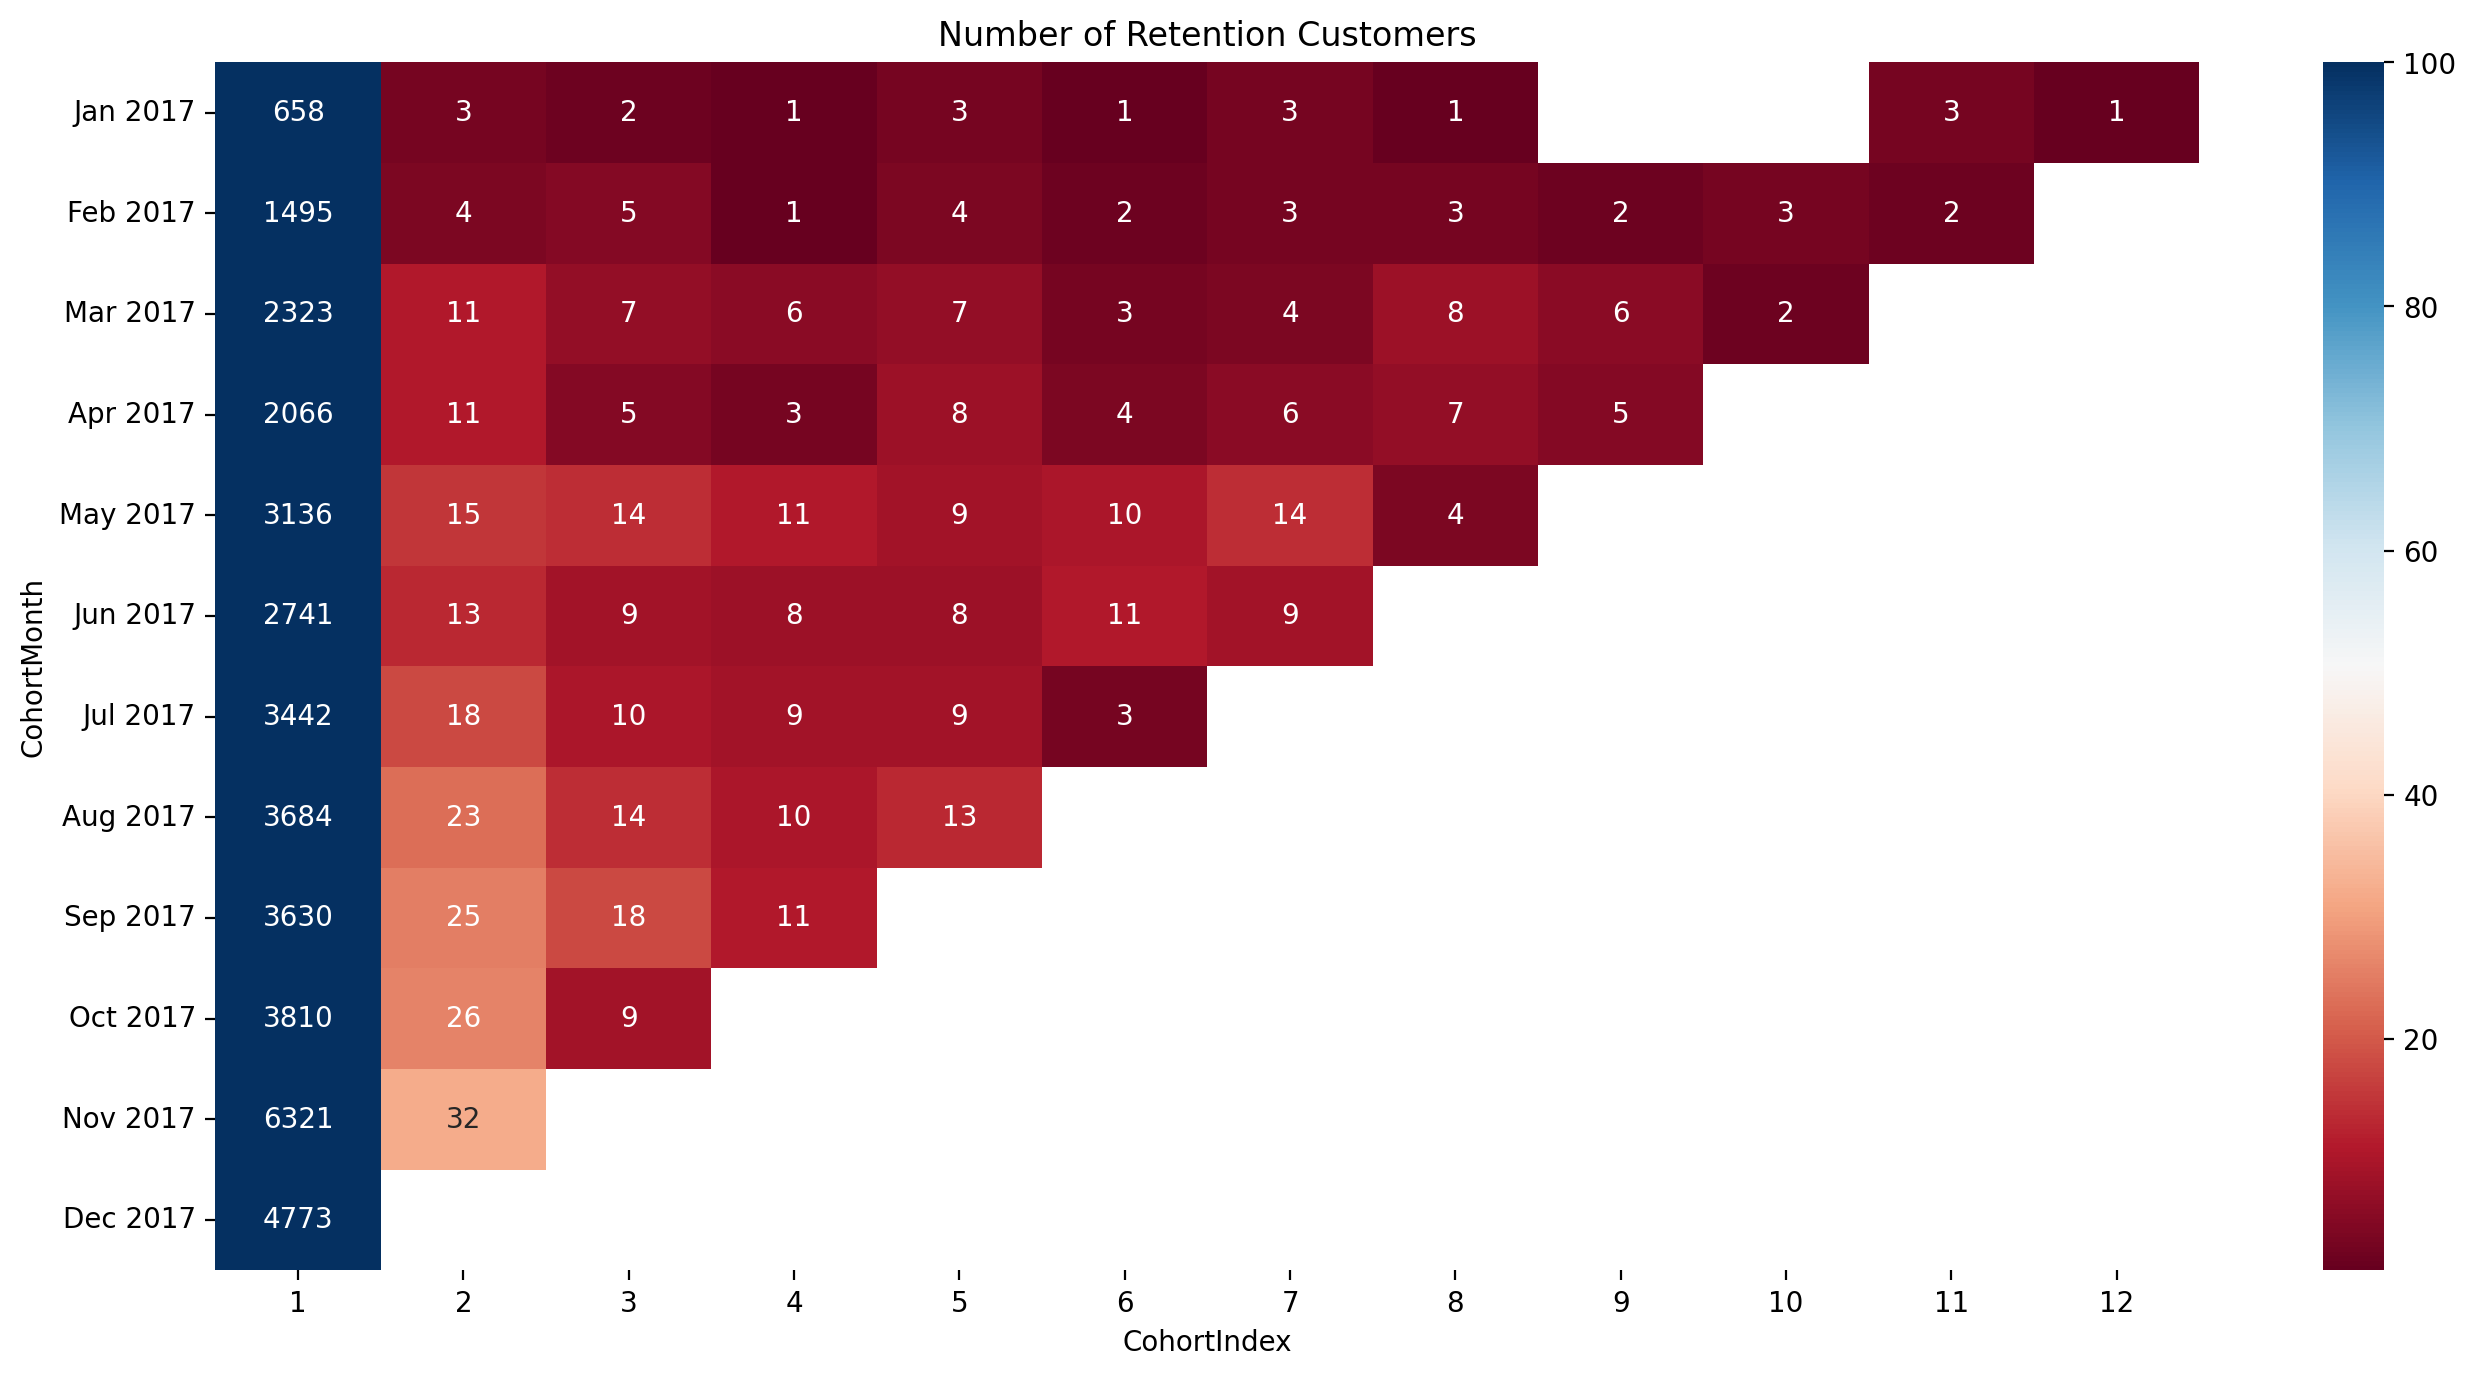

In [12]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("Number of Retention Customers")
sns.heatmap(data=cohort_counts, annot=True, fmt=".0f", cmap="RdBu", vmax=100)
plt.show();

## Retention rate

In [13]:
# Retention table
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 #to show the number as percentage 
# retention.index=retention.index.strftime("%b %Y")
retention

CohortIndex   1         2         3         4         5         6         7   \
CohortMonth                                                                    
Jan 2017     1.0  0.004559  0.003040  0.001520  0.004559  0.001520  0.004559   
Feb 2017     1.0  0.002676  0.003344  0.000669  0.002676  0.001338  0.002007   
Mar 2017     1.0  0.004735  0.003013  0.002583  0.003013  0.001291  0.001722   
Apr 2017     1.0  0.005324  0.002420  0.001452  0.003872  0.001936  0.002904   
May 2017     1.0  0.004783  0.004464  0.003508  0.002870  0.003189  0.004464   
Jun 2017     1.0  0.004743  0.003283  0.002919  0.002919  0.004013  0.003283   
Jul 2017     1.0  0.005230  0.002905  0.002615  0.002615  0.000872       NaN   
Aug 2017     1.0  0.006243  0.003800  0.002714  0.003529       NaN       NaN   
Sep 2017     1.0  0.006887  0.004959  0.003030       NaN       NaN       NaN   
Oct 2017     1.0  0.006824  0.002362       NaN       NaN       NaN       NaN   
Nov 2017     1.0  0.005062       NaN       NaN       NaN       NaN       NaN   
Dec 2017     1.0       NaN       NaN       NaN       NaN       NaN       NaN   

CohortIndex        8         9         10        11       12  
CohortMonth                                                   
Jan 2017     0.001520       NaN       NaN  0.004559  0.00152  
Feb 2017     0.002007  0.001338  0.002007  0.001338      NaN  
Mar 2017     0.003444  0.002583  0.000861       NaN      NaN  
Apr 2017     0.003388  0.002420       NaN       NaN      NaN  
May 2017     0.001276       NaN       NaN       NaN      NaN  
Jun 2017          NaN       NaN       NaN       NaN      NaN  
Jul 2017          NaN       NaN       NaN       NaN      NaN  
Aug 2017          NaN       NaN       NaN       NaN      NaN  
Sep 2017          NaN       NaN       NaN       NaN      NaN  
Oct 2017          NaN       NaN       NaN       NaN      NaN  
Nov 2017          NaN       NaN       NaN       NaN      NaN  
Dec 2017          NaN       NaN       NaN       NaN      NaN

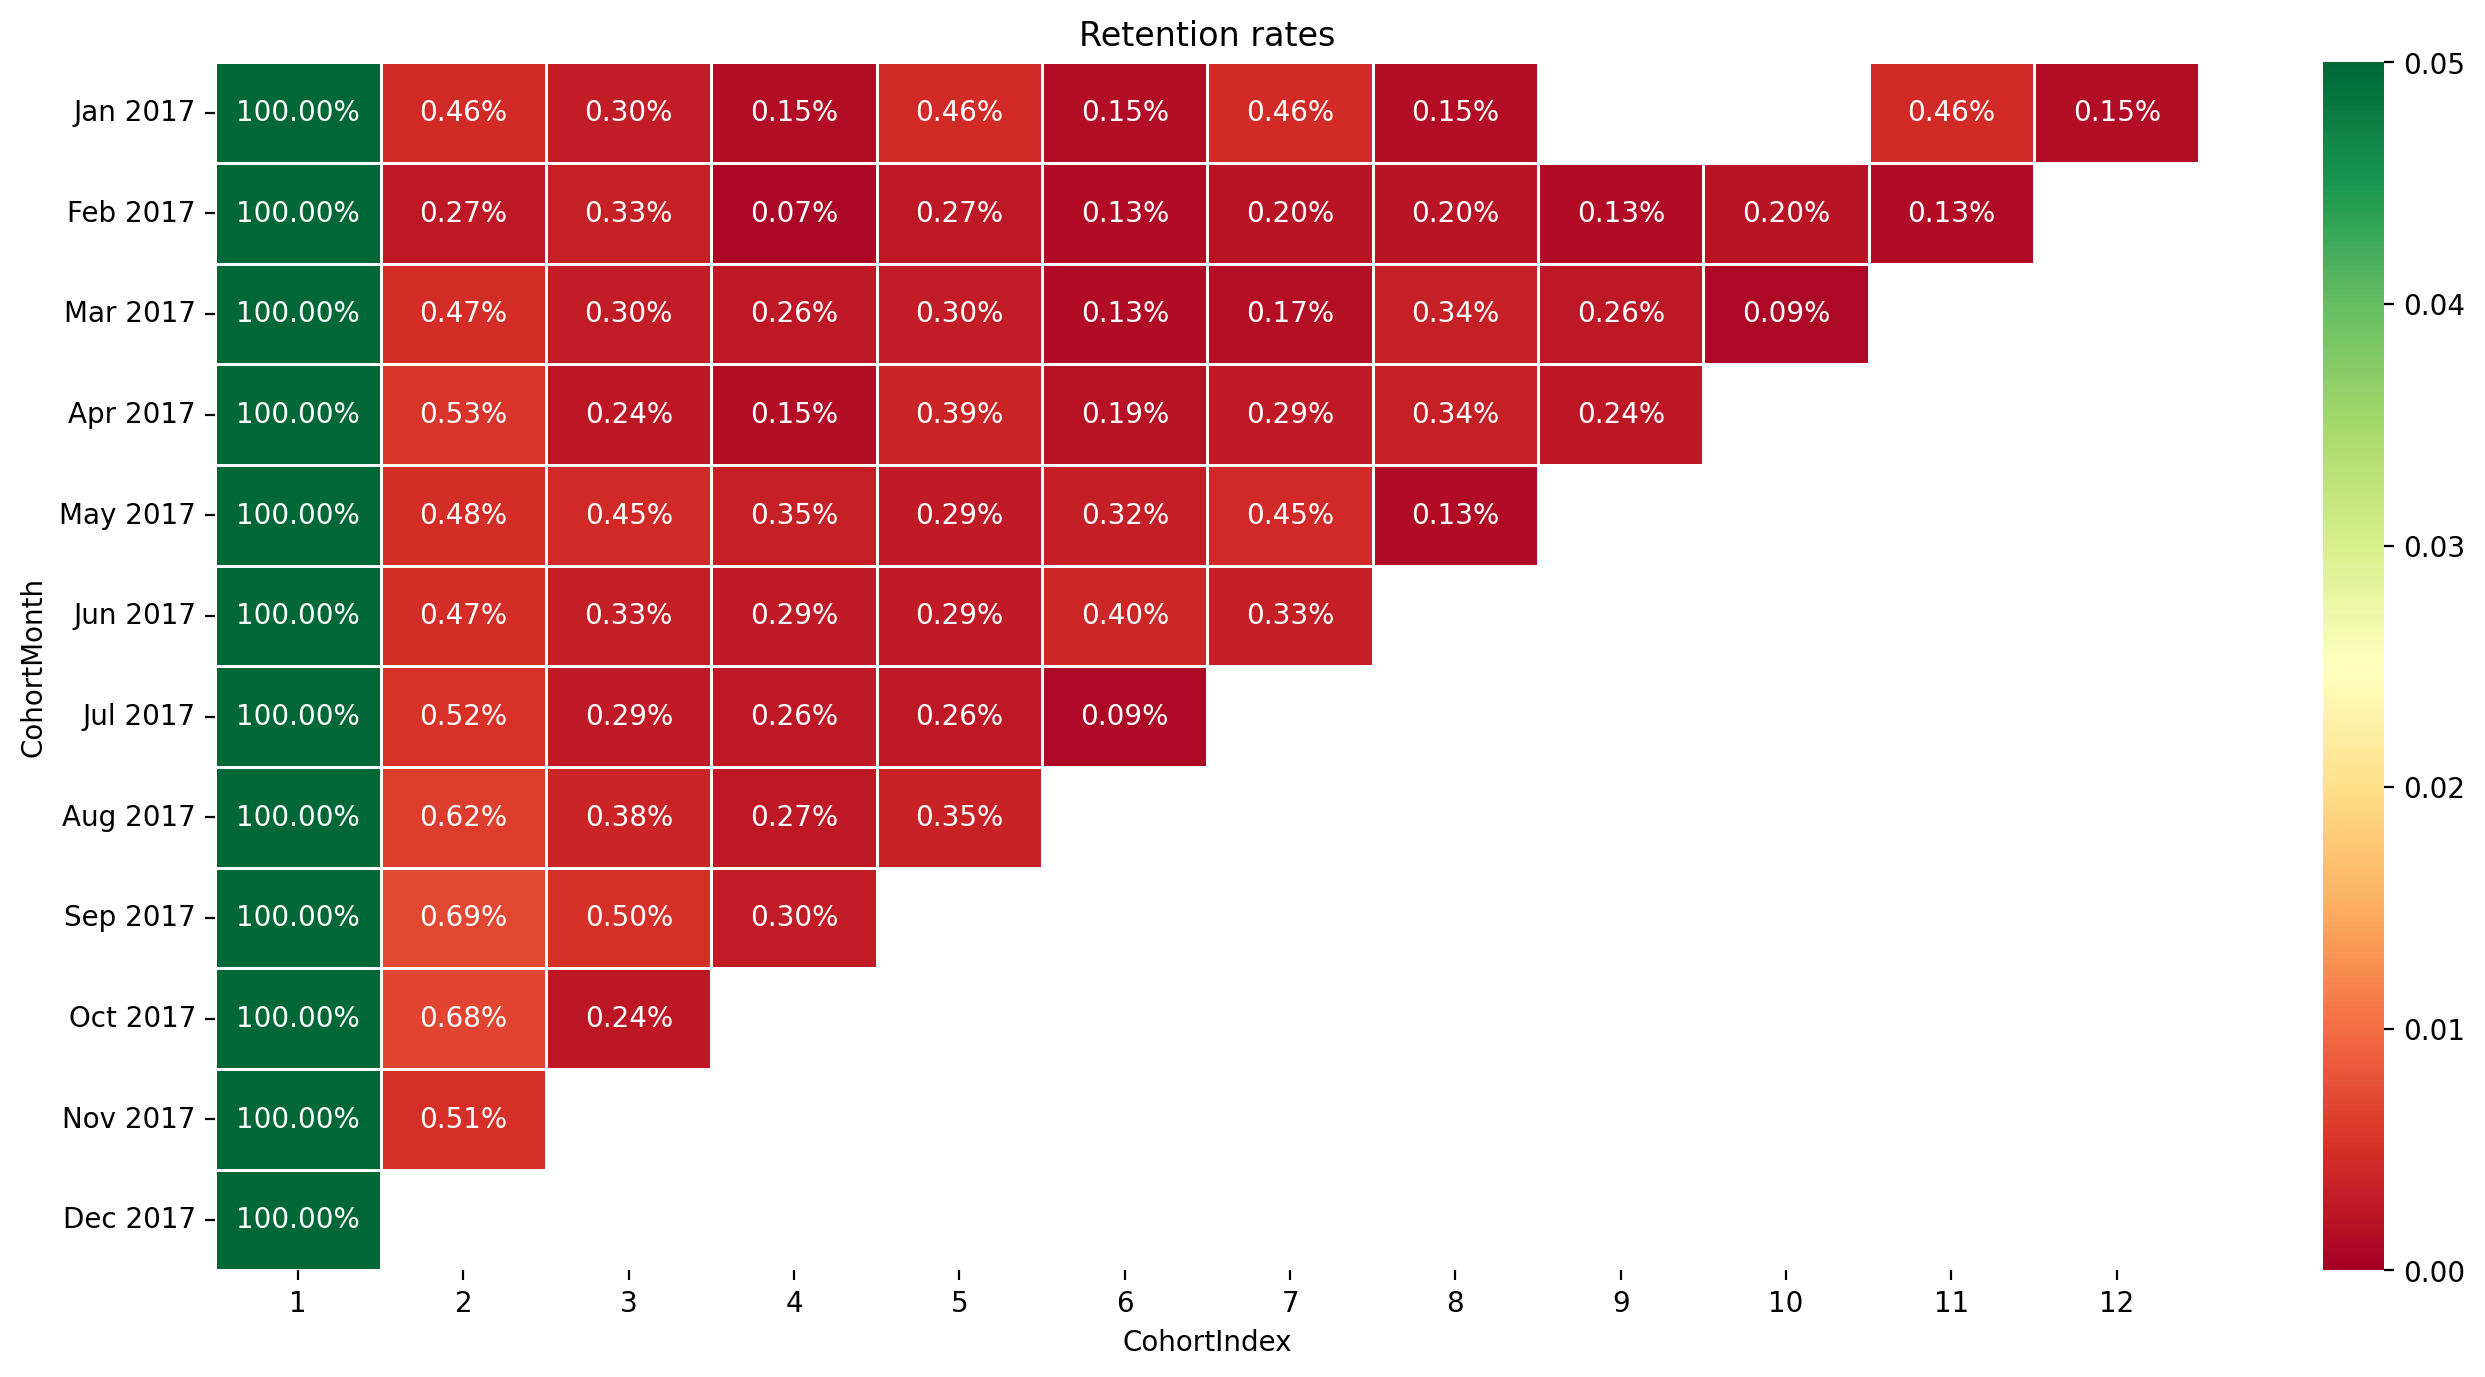

In [14]:
#Build the heatmap
plt.figure(figsize=(16,8),dpi=200)
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True, fmt = '.2%',vmin = 0.0,vmax = 0.05,cmap="RdYlGn",linewidths=.5)
plt.show()

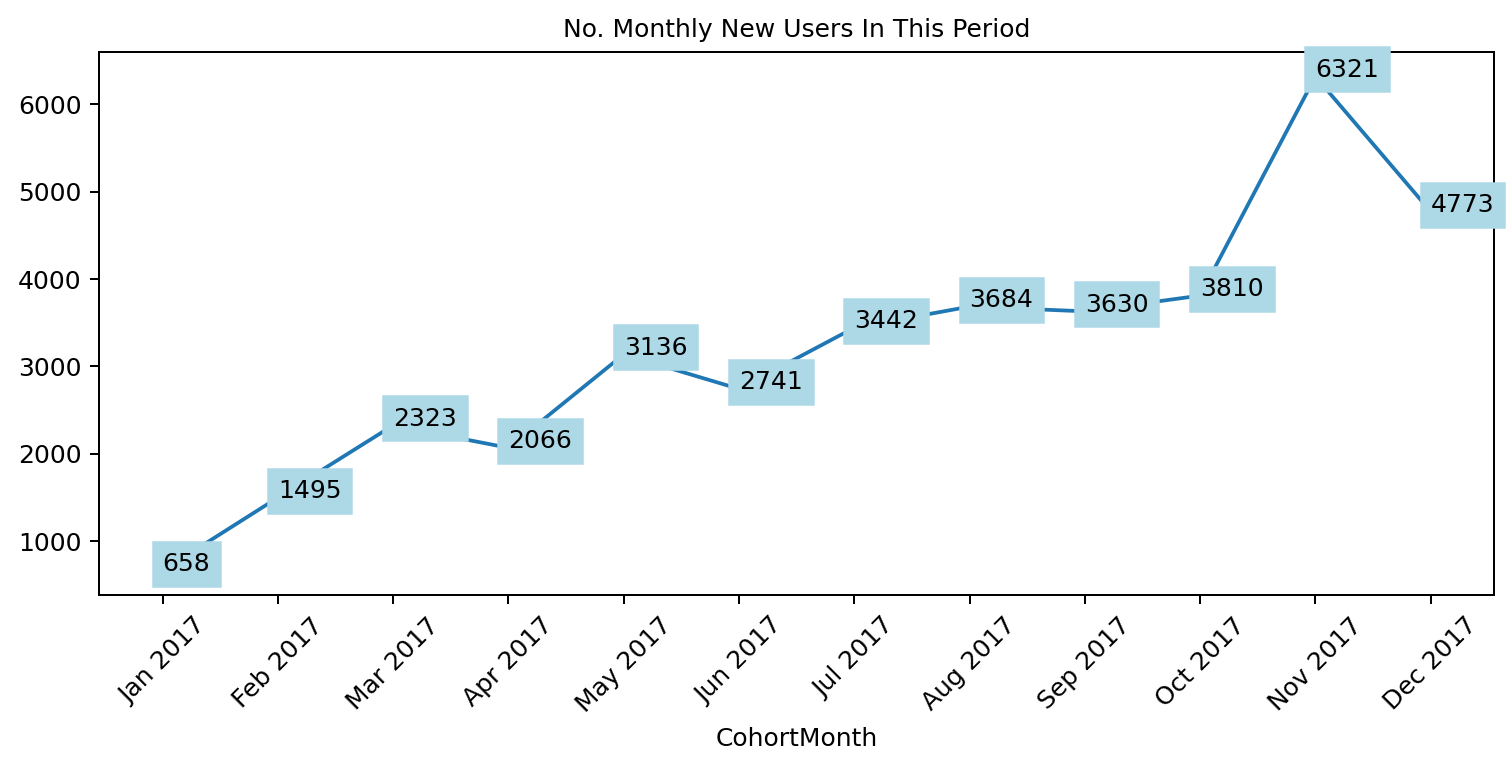

In [15]:
plt.figure(figsize=(10,4),dpi=180)
xlabel = cohort_counts[1].index
sns.lineplot( x= xlabel, y=cohort_counts[1].values, marker= "o").set_title('No. Monthly New Users In This Period', fontsize = 10)
plt.xticks(rotation=45)
for x, y in zip(cohort_counts[1].index, cohort_counts[1].values): 
    plt.text(x = x, y = y, s = '{:.0f}'.format(y), color = 'black').set_backgroundcolor("lightblue");

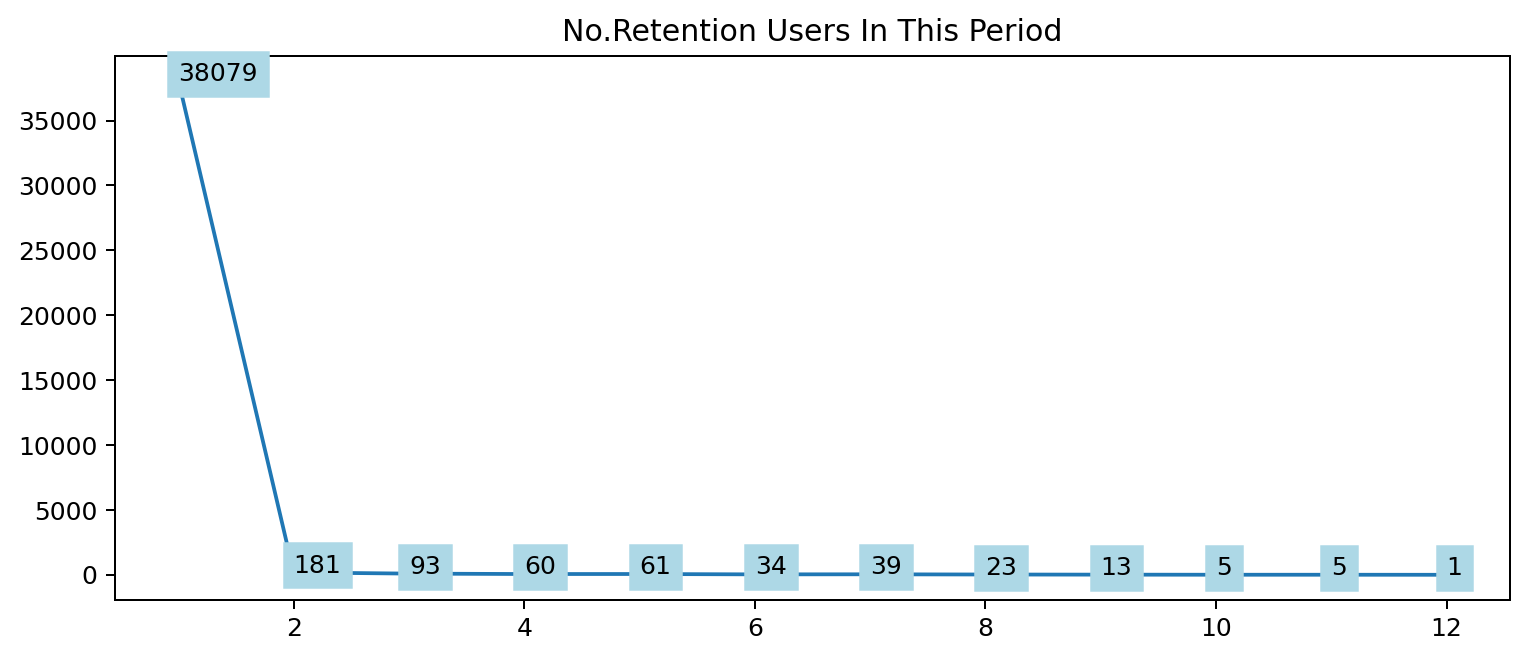

In [16]:
grand_total = cohort_counts.append(cohort_counts.sum(numeric_only=True), ignore_index=True)
grand_total = grand_total[-1:].T

plt.figure(figsize=(10,4),dpi=180)
xlabel = list(grand_total.index)
sns.lineplot( x= xlabel, y=list(grand_total[12])).set_title('No.Retention Users In This Period')
# plt.xticks(rotation=45)
for x, y in zip(list(grand_total.index), list(grand_total[12])): 
    plt.text(x = x, y = y, s = '{:.0f}'.format(y), color = 'black').set_backgroundcolor("lightblue")

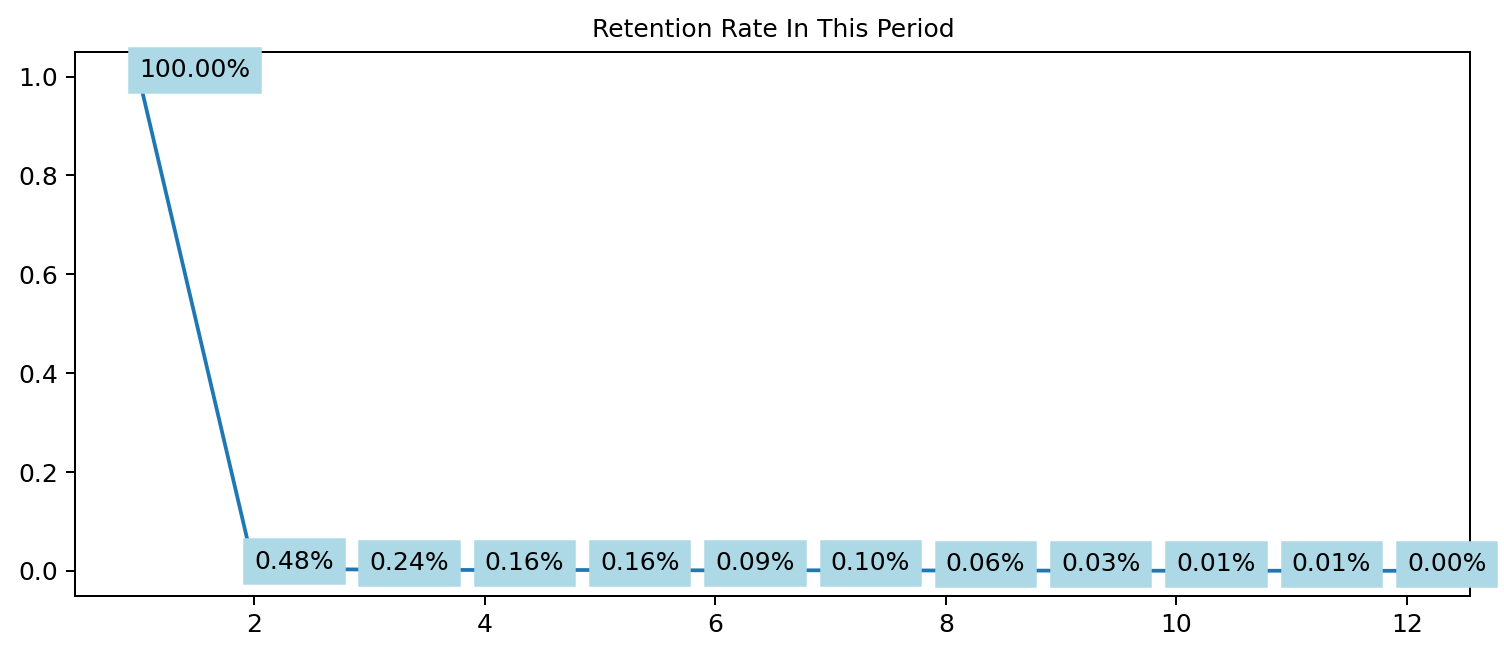

In [17]:
grand_total = cohort_counts.append(cohort_counts.sum(numeric_only=True), ignore_index=True)
grand_total = grand_total[-1:]
rentention_size = grand_total .iloc[:,0]

retention_all = grand_total.divide(rentention_size,axis=0)
retention_all = retention_all.T

plt.figure(figsize=(10,4),dpi=180)
xlabel = list(retention_all.index)
sns.lineplot( x= xlabel, y=list(retention_all[12])).set_title('Retention Rate In This Period', fontsize = 10)
# plt.xticks(rotation=45)
for x, y in zip(list(retention_all.index), list(retention_all[12])): 
    plt.text(x = x, y = y, s = '{:.2%}'.format(y), color = 'black').set_backgroundcolor("lightblue");


## Revenue

In [18]:
revenue_total = df.groupby(['order_month']).agg({'customer_unique_id': pd.Series.nunique, 'order_id': pd.Series.nunique, 'total_amount': pd.Series.sum})

# Rename columns
revenue_total.rename(columns = {'customer_unique_id': 'No_customers', 
                              'order_id' : 'No_orders', 
                              'total_amount' : 'Revenue'}, inplace = True)
revenue_total['aov'] = revenue_total['Revenue'] / revenue_total['No_orders'] ##AVOV: average order value
revenue_total.index = revenue_total.index.strftime("%b %Y")
# Sample RFM data 
revenue_total

No_customers  No_orders    Revenue         aov
order_month                                                
Jan 2017              658        691   86081.70  124.575543
Feb 2017             1498       1519  178919.55  117.787722
Mar 2017             2329       2361  278881.94  118.120263
Apr 2017             2083       2113  256973.28  121.615372
May 2017             3158       3218  380860.87  118.353285
Jun 2017             2772       2831  322348.95  113.863988
Jul 2017             3484       3550  422623.24  119.048800
Aug 2017             3737       3803  442455.30  116.343755
Sep 2017             3691       3746  454227.95  121.256794
Oct 2017             3892       3953  473500.20  119.782494
Nov 2017             6428       6520  771924.84  118.393380
Dec 2017             4864       4919  583704.64  118.663273

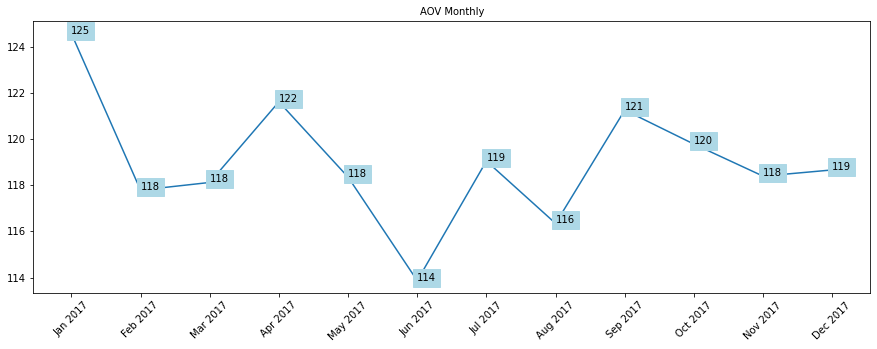

In [19]:
# Aov par month
plt.figure(figsize=(15,5))
xlabel = list(revenue_total.index)
sns.lineplot( x= xlabel, y=list(revenue_total['aov']), marker= "o").set_title('AOV Monthly', fontsize = 10)
plt.xticks(rotation=45)
for x, y in zip(list(revenue_total.index), list(revenue_total['aov'])): 
    plt.text(x = x, y = y, s = '{:.0f}'.format(y), color = 'black').set_backgroundcolor("lightblue");

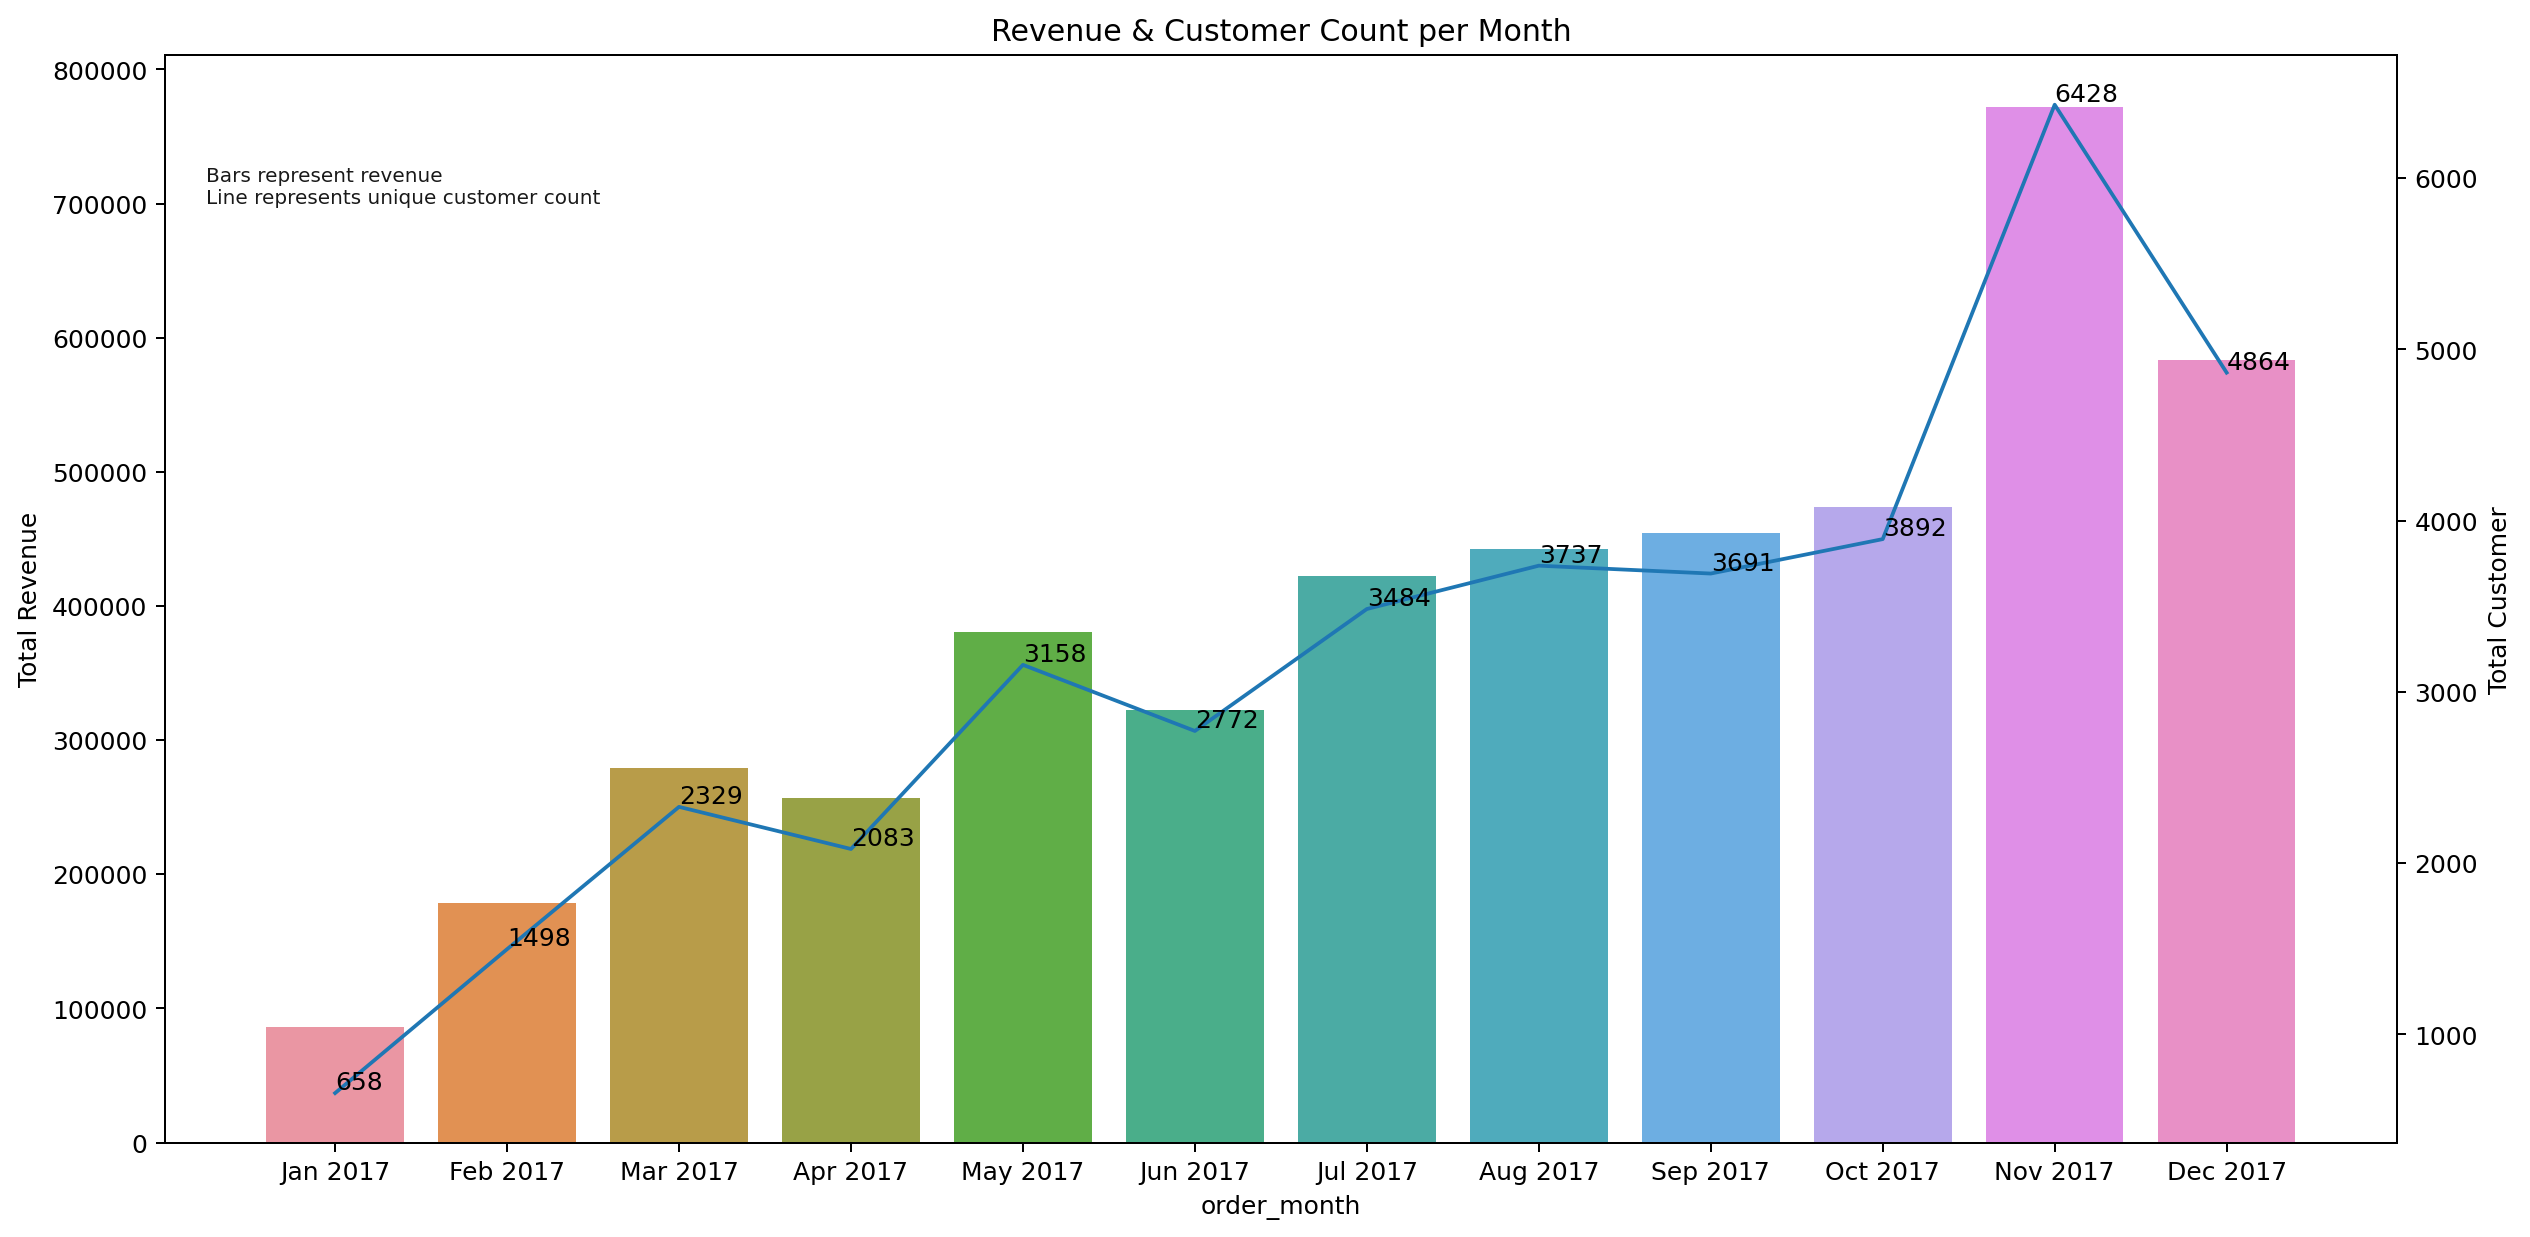

In [20]:
fig, ax = plt.subplots(figsize = (16, 8), dpi=180)

sns.barplot(x = revenue_total.index, y = revenue_total.Revenue, ax = ax)
ax2 = ax.twinx()
sns.lineplot(x = revenue_total.index, y = revenue_total.No_customers, ax = ax2)


ax2.set_ylabel("Total Customer")
ax.set_ylabel("Total Revenue")
plt.title("Revenue & Customer Count per Month")
ax.text(-0.75, 700000, "Bars represent revenue \nLine represents unique customer count", 
        fontsize = 8, alpha = 0.9)
for x, y in zip(revenue_total.index,  revenue_total.No_customers):
    ax2.text(x , y + 20 , y)
    


In [21]:
#Count monthly active customers from each cohort
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
# Return totalAmount.
aov_1 = grouping[['total_amount']].apply(pd.Series.sum)
aov_1 = aov_1.reset_index()
# Return unique order
aov_2 = grouping['order_id'].apply(pd.Series.nunique)
aov_2 = aov_2.reset_index()
aov_data = pd.merge(aov_1, aov_2, how='left', left_on=['CohortMonth','CohortIndex'], right_on = ['CohortMonth','CohortIndex'])
aov_data['aov'] = (aov_data['total_amount'] / aov_data['order_id']).round(2)
aov_data


CohortMonth  CohortIndex  total_amount  order_id     aov
0   2017-01-01            1      86081.70       691  124.58
1   2017-01-01            2        170.83         3   56.94
2   2017-01-01            3        114.70         2   57.35
3   2017-01-01            4         89.70         1   89.70
4   2017-01-01            5        246.25         3   82.08
..         ...          ...           ...       ...     ...
71  2017-10-01            2       3005.71        28  107.35
72  2017-10-01            3       1190.95         9  132.33
73  2017-11-01            1     759388.26      6408  118.51
74  2017-11-01            2       4124.72        34  121.32
75  2017-12-01            1     572139.25      4822  118.65

[76 rows x 5 columns]

In [22]:
aov_counts = aov_data.pivot(index='CohortMonth',columns='CohortIndex',values='aov')
aov_counts

CohortIndex      1       2       3       4       5       6       7       8   \
CohortMonth                                                                   
2017-01-01   124.58   56.94   57.35   89.70   82.08   69.33  149.48  105.17   
2017-02-01   117.91  146.41  114.13   57.72  178.05   37.11   99.99   91.43   
2017-03-01   118.12  110.40   74.43  135.92  114.59  166.49  172.30  110.93   
2017-04-01   121.71  105.30  141.13   84.79  237.05  131.50  115.23  156.65   
2017-05-01   118.55  100.72  159.03  104.70  108.21  118.45  111.36   96.14   
2017-06-01   113.74  143.83  189.11  127.83  171.86   91.90  114.48     NaN   
2017-07-01   118.85  116.12  103.07  128.48   99.02  125.61     NaN     NaN   
2017-08-01   115.90  147.98  139.31   95.20  107.88     NaN     NaN     NaN   
2017-09-01   121.11  118.83  106.84  115.51     NaN     NaN     NaN     NaN   
2017-10-01   119.55  107.35  132.33     NaN     NaN     NaN     NaN     NaN   
2017-11-01   118.51  121.32     NaN     NaN     NaN     NaN     NaN     NaN   
2017-12-01   118.65     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

CohortIndex      9       10      11    12  
CohortMonth                                
2017-01-01      NaN     NaN  142.35  66.6  
2017-02-01   232.30  128.45  171.61   NaN  
2017-03-01   162.72  118.98     NaN   NaN  
2017-04-01   135.03     NaN     NaN   NaN  
2017-05-01      NaN     NaN     NaN   NaN  
2017-06-01      NaN     NaN     NaN   NaN  
2017-07-01      NaN     NaN     NaN   NaN  
2017-08-01      NaN     NaN     NaN   NaN  
2017-09-01      NaN     NaN     NaN   NaN  
2017-10-01      NaN     NaN     NaN   NaN  
2017-11-01      NaN     NaN     NaN   NaN  
2017-12-01      NaN     NaN     NaN   NaN

In [23]:
aov_counts.index = aov_counts.index.strftime("%b %Y")

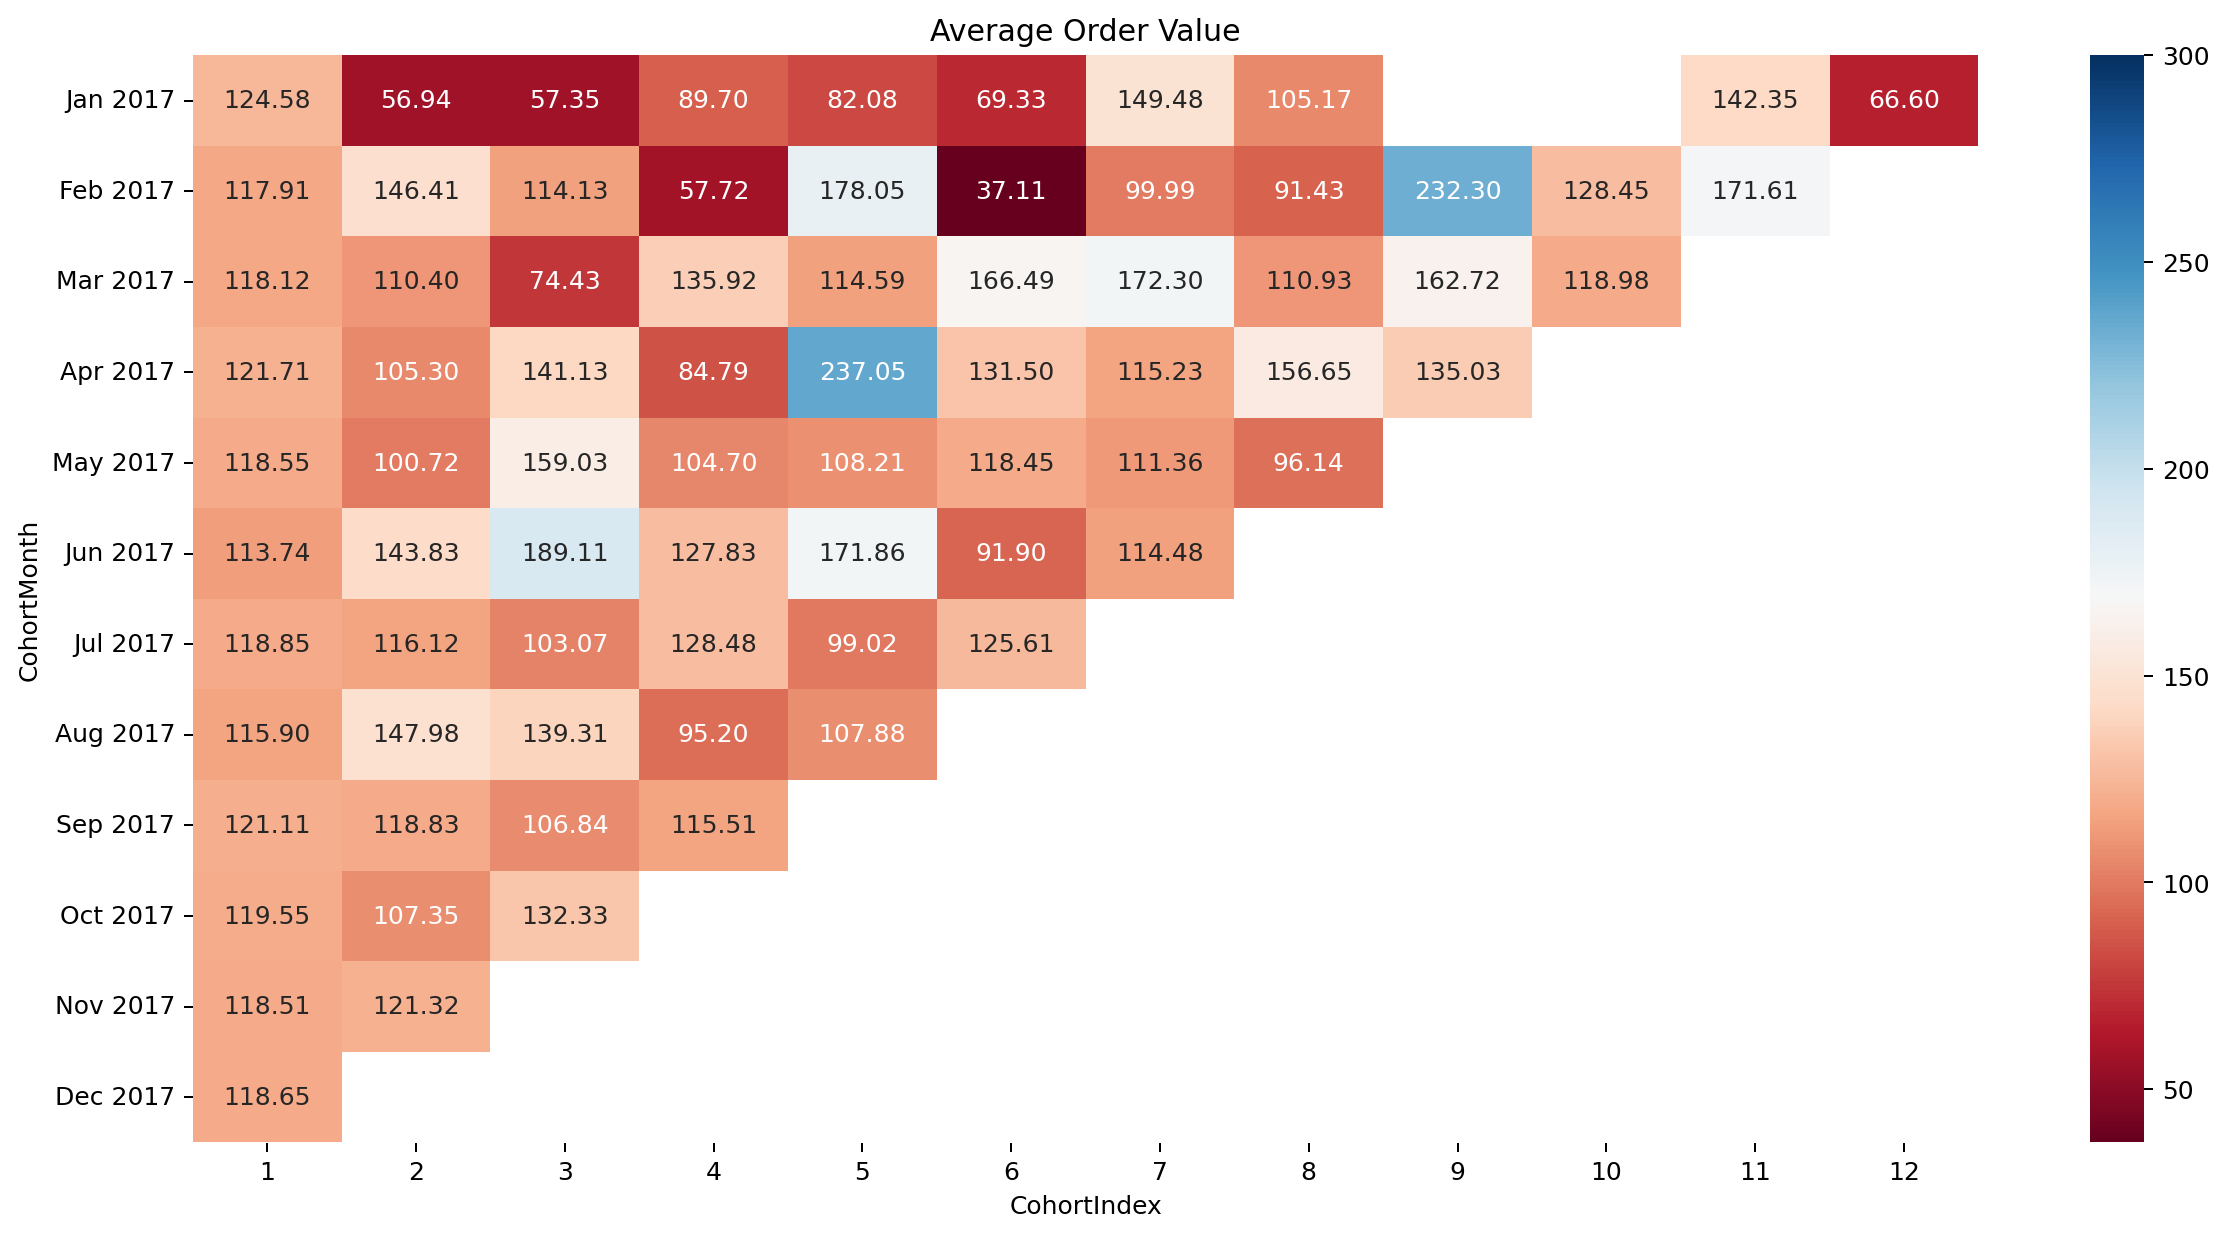

In [24]:
plt.figure(figsize=(16,8),dpi=180)
plt.title("Average Order Value")
sns.heatmap(data=aov_counts, annot=True, fmt=".2f", cmap="RdBu", vmax=300)
plt.show()

## Customer Retention KPIs

### 1. Churn Rate

In [25]:
# Churn Rate = 1- Retention Rate
cohort_size = cohort_counts.iloc[:,0]
churn = 1 - cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
churn.round(3) * 100 #to show the number as percentage 

CohortIndex   1     2     3     4     5     6     7     8     9     10    11  \
CohortMonth                                                                    
Jan 2017     0.0  99.5  99.7  99.8  99.5  99.8  99.5  99.8   NaN   NaN  99.5   
Feb 2017     0.0  99.7  99.7  99.9  99.7  99.9  99.8  99.8  99.9  99.8  99.9   
Mar 2017     0.0  99.5  99.7  99.7  99.7  99.9  99.8  99.7  99.7  99.9   NaN   
Apr 2017     0.0  99.5  99.8  99.9  99.6  99.8  99.7  99.7  99.8   NaN   NaN   
May 2017     0.0  99.5  99.6  99.6  99.7  99.7  99.6  99.9   NaN   NaN   NaN   
Jun 2017     0.0  99.5  99.7  99.7  99.7  99.6  99.7   NaN   NaN   NaN   NaN   
Jul 2017     0.0  99.5  99.7  99.7  99.7  99.9   NaN   NaN   NaN   NaN   NaN   
Aug 2017     0.0  99.4  99.6  99.7  99.6   NaN   NaN   NaN   NaN   NaN   NaN   
Sep 2017     0.0  99.3  99.5  99.7   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Oct 2017     0.0  99.3  99.8   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Nov 2017     0.0  99.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Dec 2017     0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

CohortIndex    12  
CohortMonth        
Jan 2017     99.8  
Feb 2017      NaN  
Mar 2017      NaN  
Apr 2017      NaN  
May 2017      NaN  
Jun 2017      NaN  
Jul 2017      NaN  
Aug 2017      NaN  
Sep 2017      NaN  
Oct 2017      NaN  
Nov 2017      NaN  
Dec 2017      NaN

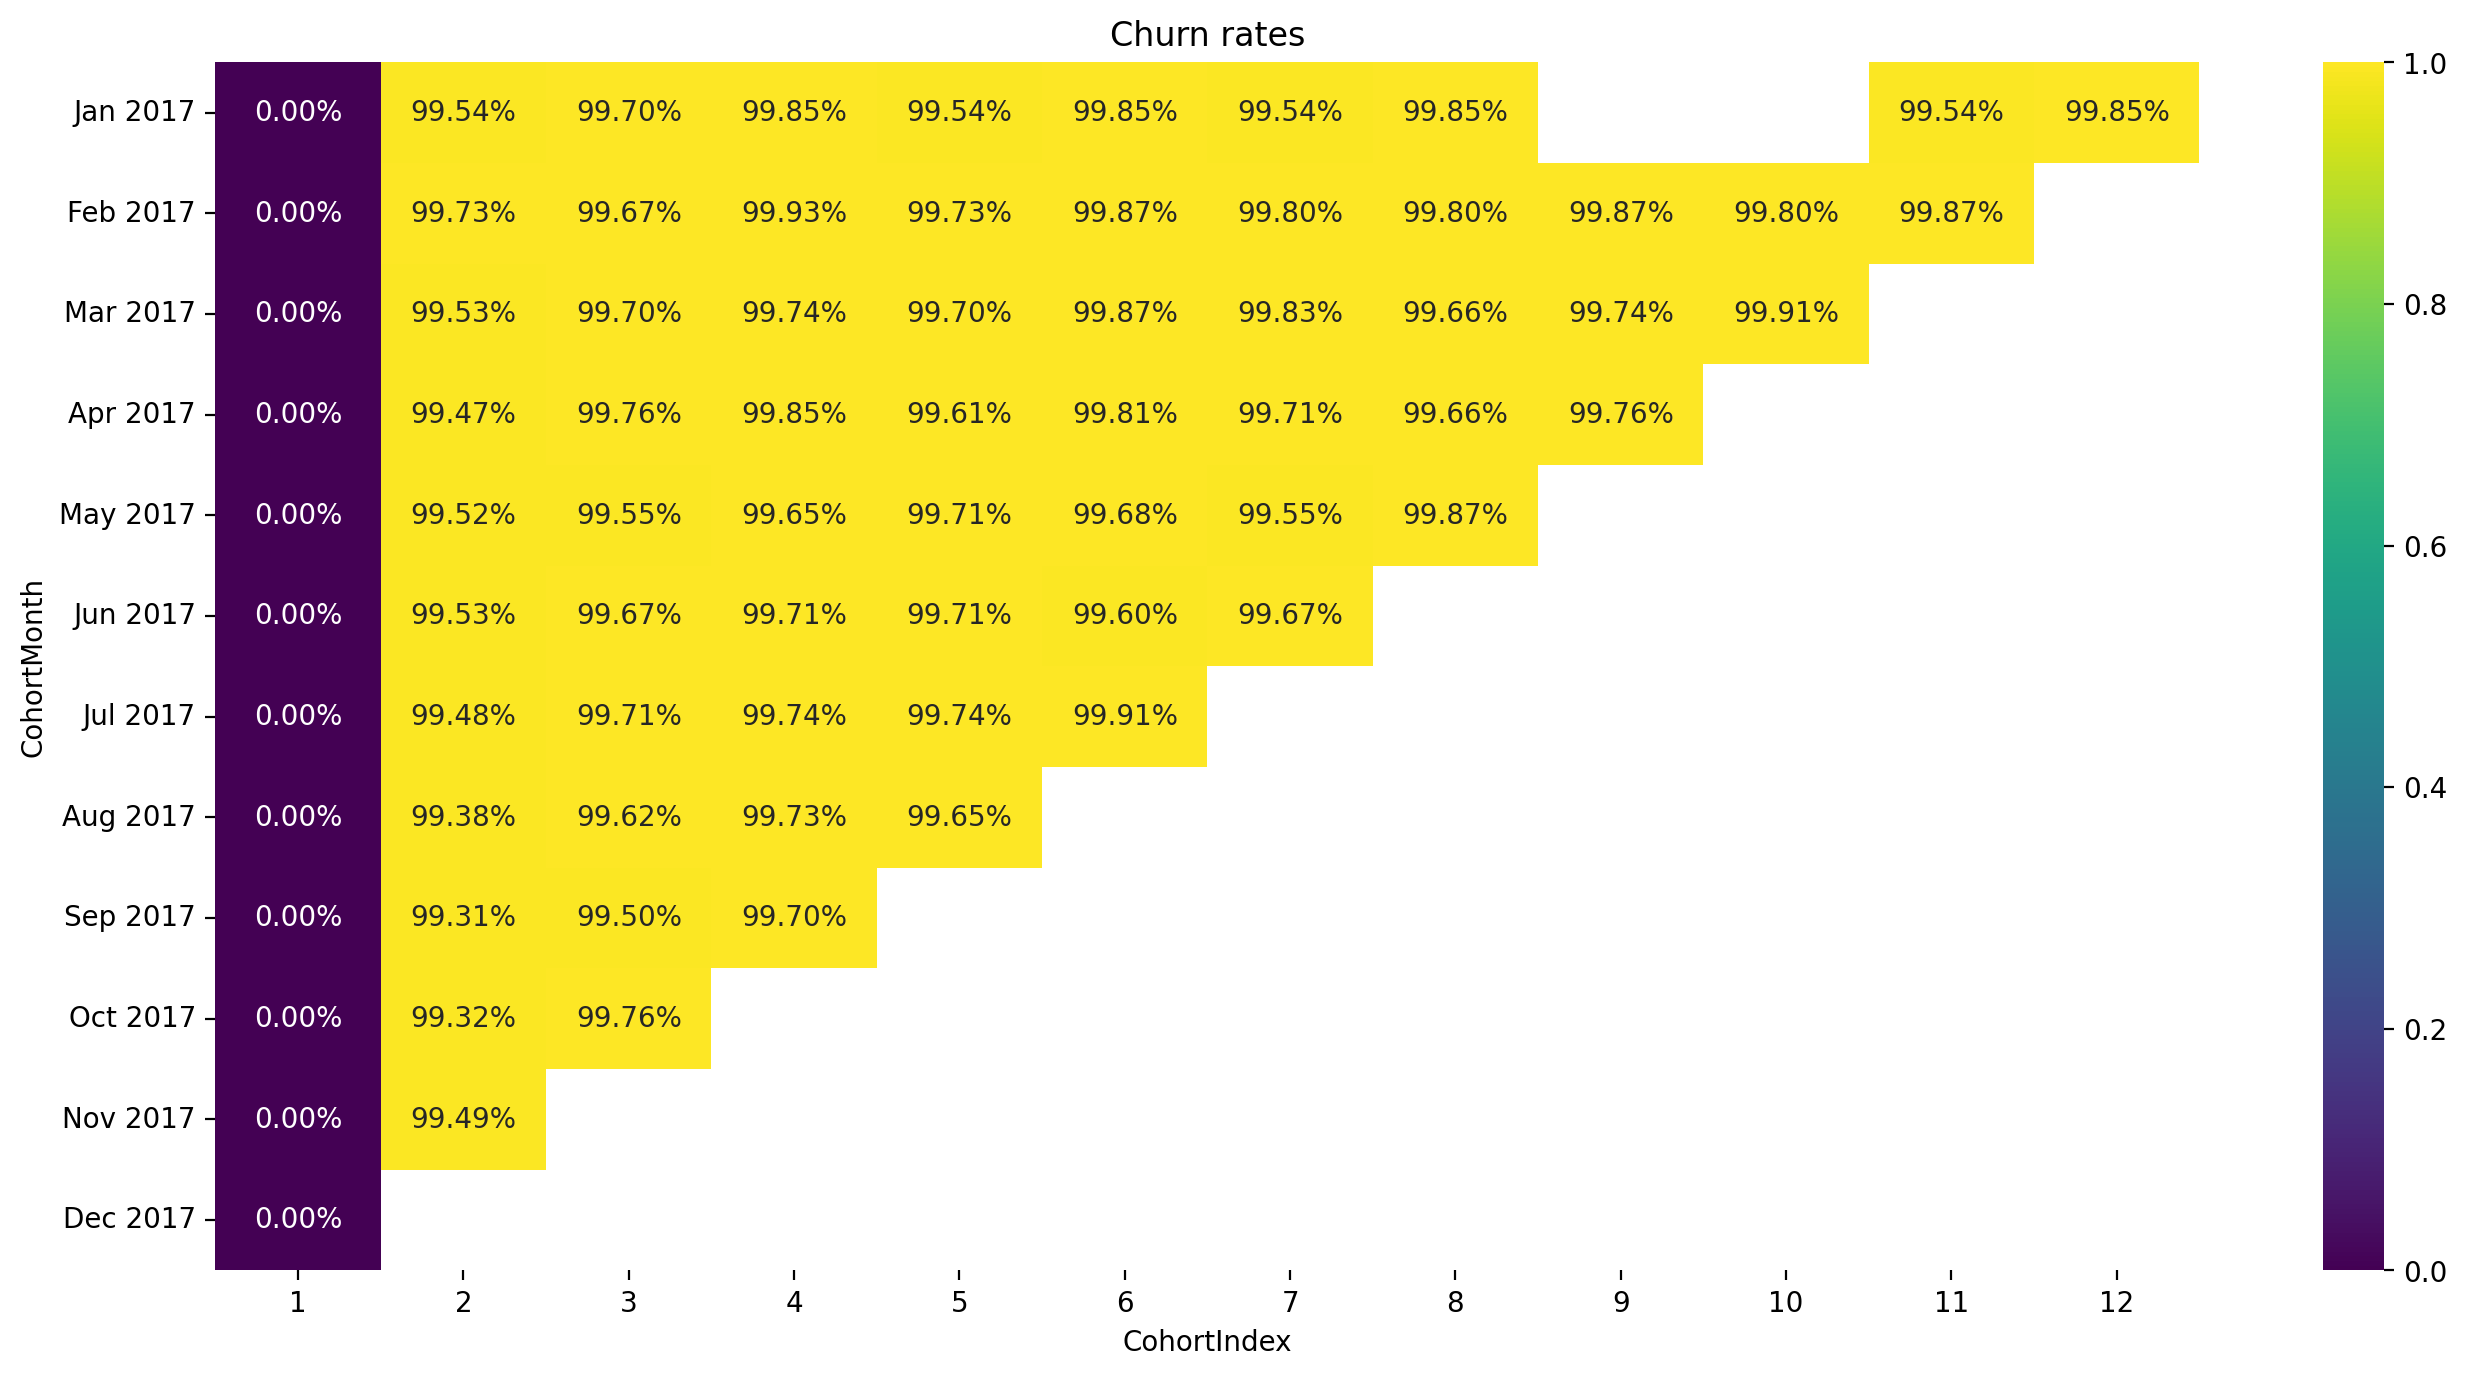

In [26]:
#Build the heatmap for churn rate
plt.figure(figsize=(16,8), dpi=200)
plt.title('Churn rates')
sns.heatmap(data=churn,annot = True, fmt = '.2%',vmin = 0,vmax = 1,cmap="viridis")
plt.show()

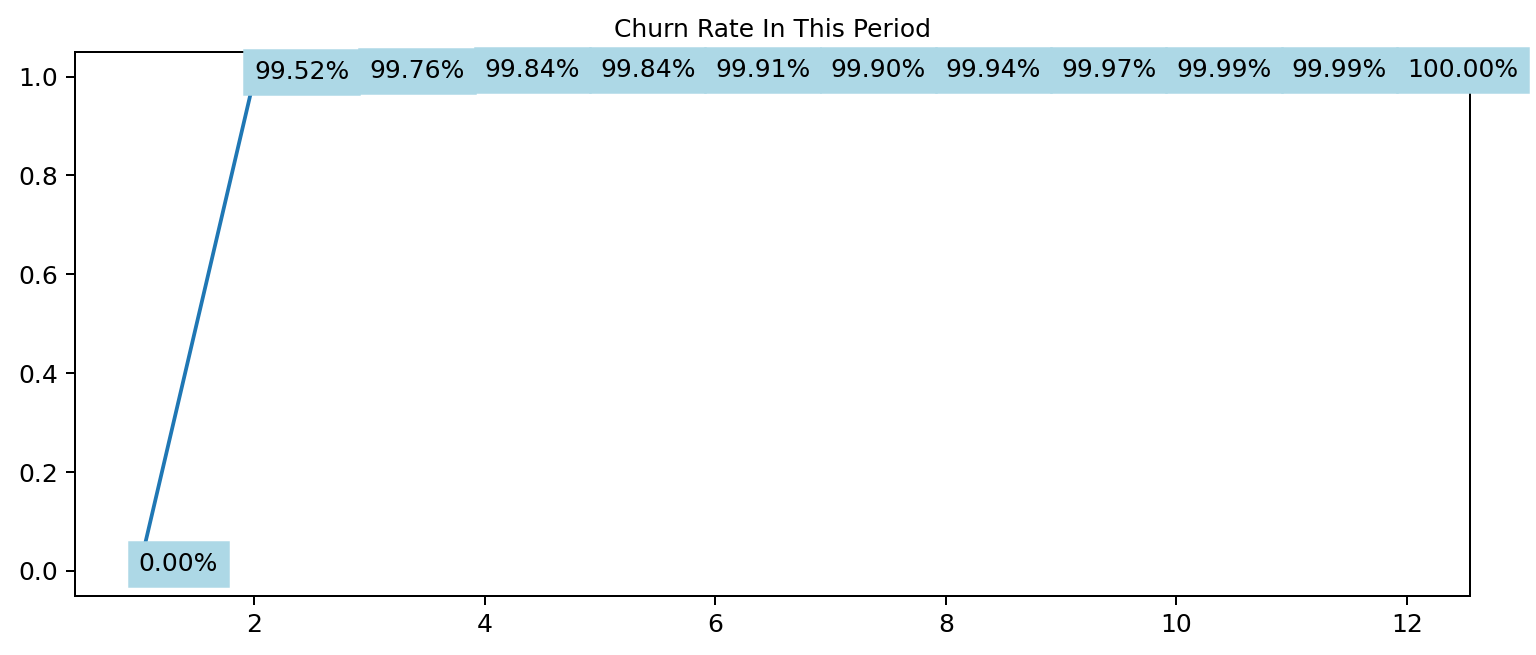

In [27]:
grand_total = cohort_counts.append(cohort_counts.sum(numeric_only=True), ignore_index=True)
grand_total = grand_total[-1:]
rentention_size = grand_total .iloc[:,0]

retention_all = 1 - grand_total.divide(rentention_size,axis=0)
retention_all = retention_all.T

plt.figure(figsize=(10,4),dpi=180)
xlabel = list(retention_all.index)
sns.lineplot( x= xlabel, y=list(retention_all[12])).set_title('Churn Rate In This Period', fontsize = 10)
# plt.xticks(rotation=45)
for x, y in zip(list(retention_all.index), list(retention_all[12])): 
    plt.text(x = x, y = y, s = '{:.2%}'.format(y), color = 'black', fontsize = 10).set_backgroundcolor("lightblue");

### 2. Repeat purchase ratio

In [28]:
rpr = df.groupby('customer_unique_id').agg({'order_id': lambda x: x.nunique(),
                                       'order_item_id': lambda x: x.count(),
                                       'total_amount': lambda x: x.sum()})

rpr

order_id  order_item_id  total_amount
customer_unique_id                                                     
0000f46a3911fa3c0805444483337064         1              1         86.22
0000f6ccb0745a6a4b88665a16c9f078         1              1         43.62
0004aac84e0df4da2b147fca70cf8255         1              1        196.89
0005e1862207bf6ccc02e4228effd9a0         1              1        150.12
0006fdc98a402fceb4eb0ee528f6a8d4         1              1         29.00
...                                    ...            ...           ...
fffa431dd3fcdefea4b1777d114144f2         1              1         81.20
fffb09418989a0dbff854a28163e47c6         1              1         73.16
fffea47cd6d3cc0a88bd621562a9d061         1              1         84.58
ffff371b4d645b6ecea244b27531430a         1              1        112.46
ffffd2657e2aad2907e67c3e9daecbeb         1              1         71.56

[38079 rows x 3 columns]

In [29]:
repeat_purchase_ratio = round((rpr[rpr.order_id > 1].shape[0] / rpr.shape[0]*100),1)
print(f'Repeat Purchase Ratio in this period: {repeat_purchase_ratio}%')

Repeat Purchase Ratio in this period: 2.7%


### 3. Monthly Recurring Revenue

In [30]:
# Chart cohort for MRR
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
# Return totalAmount.
mrr_data = round(grouping[['total_amount']].apply(pd.Series.sum)/1000, 2)
mrr_data = mrr_data.reset_index()
mrr_sum = mrr_data.pivot(index='CohortMonth',columns='CohortIndex',values='total_amount')
mrr_sum.index = mrr_sum.index.strftime("%b %Y")
mrr_sum

CohortIndex      1     2     3     4     5     6     7     8     9     10  \
CohortMonth                                                                 
Jan 2017      86.08  0.17  0.11  0.09  0.25  0.07  0.45  0.11   NaN   NaN   
Feb 2017     178.75  0.59  0.57  0.06  0.71  0.07  0.30  0.27  0.46  0.39   
Mar 2017     278.18  1.32  0.52  1.09  0.80  0.50  0.69  0.89  0.98  0.24   
Apr 2017     254.99  1.26  0.85  0.34  1.90  0.53  0.81  1.10  0.68   NaN   
May 2017     378.77  1.61  2.39  1.15  0.97  1.42  1.67  0.38   NaN   NaN   
Jun 2017     318.02  1.87  1.89  1.02  1.37  1.01  1.03   NaN   NaN   NaN   
Jul 2017     416.70  2.32  1.03  1.16  1.09  0.38   NaN   NaN   NaN   NaN   
Aug 2017     434.29  3.40  2.23  0.95  1.40   NaN   NaN   NaN   NaN   NaN   
Sep 2017     446.31  2.97  1.92  1.73   NaN   NaN   NaN   NaN   NaN   NaN   
Oct 2017     462.19  3.01  1.19   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Nov 2017     759.39  4.12   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Dec 2017     572.14   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

CohortIndex    11    12  
CohortMonth              
Jan 2017     0.43  0.07  
Feb 2017     0.34   NaN  
Mar 2017      NaN   NaN  
Apr 2017      NaN   NaN  
May 2017      NaN   NaN  
Jun 2017      NaN   NaN  
Jul 2017      NaN   NaN  
Aug 2017      NaN   NaN  
Sep 2017      NaN   NaN  
Oct 2017      NaN   NaN  
Nov 2017      NaN   NaN  
Dec 2017      NaN   NaN

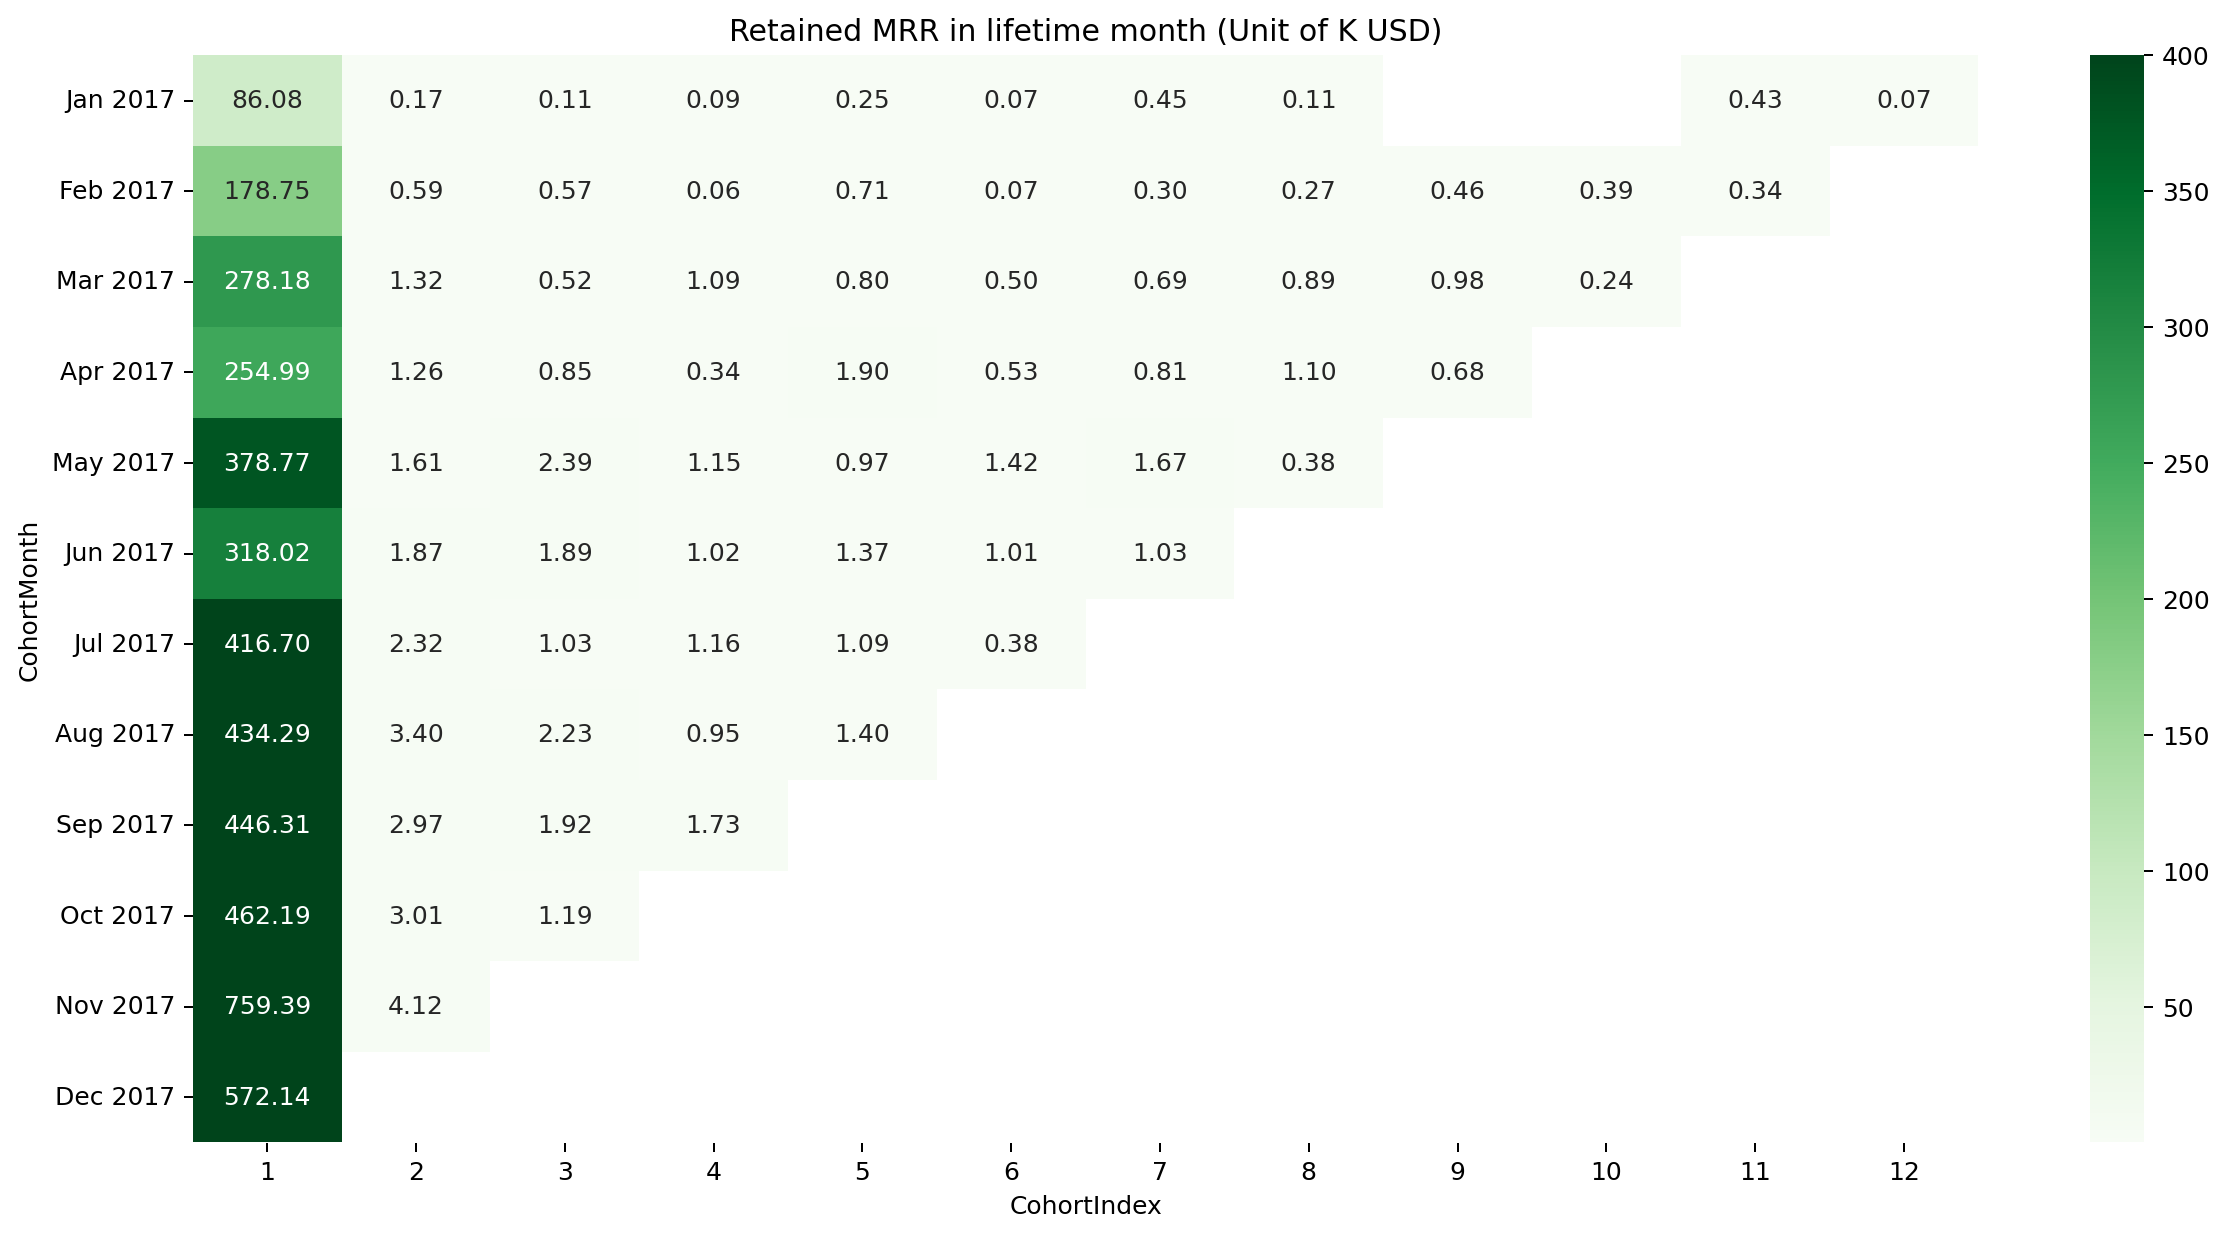

In [31]:
plt.figure(figsize=(16,8),dpi=180)
plt.title("Retained MRR in lifetime month (Unit of K USD)")
sns.heatmap(data=mrr_sum, annot=True, fmt=".2f", cmap="Greens", vmax=400)
plt.show()

In [32]:
# Cohort "% of retained MRR in lifetime month"
mrr_size = mrr_sum.iloc[:,0]
mrr_per = mrr_sum.divide(mrr_size,axis=0) #axis=0 to ensure the divide along the row axis 
mrr_per = mrr_per.round(3) #to show the number as percentage 
# retention.index=retention.index.strftime("%b %Y")
mrr_per

CohortIndex   1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                
Jan 2017     1.0  0.002  0.001  0.001  0.003  0.001  0.005  0.001    NaN   
Feb 2017     1.0  0.003  0.003  0.000  0.004  0.000  0.002  0.002  0.003   
Mar 2017     1.0  0.005  0.002  0.004  0.003  0.002  0.002  0.003  0.004   
Apr 2017     1.0  0.005  0.003  0.001  0.007  0.002  0.003  0.004  0.003   
May 2017     1.0  0.004  0.006  0.003  0.003  0.004  0.004  0.001    NaN   
Jun 2017     1.0  0.006  0.006  0.003  0.004  0.003  0.003    NaN    NaN   
Jul 2017     1.0  0.006  0.002  0.003  0.003  0.001    NaN    NaN    NaN   
Aug 2017     1.0  0.008  0.005  0.002  0.003    NaN    NaN    NaN    NaN   
Sep 2017     1.0  0.007  0.004  0.004    NaN    NaN    NaN    NaN    NaN   
Oct 2017     1.0  0.007  0.003    NaN    NaN    NaN    NaN    NaN    NaN   
Nov 2017     1.0  0.005    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Dec 2017     1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

CohortIndex     10     11     12  
CohortMonth                       
Jan 2017       NaN  0.005  0.001  
Feb 2017     0.002  0.002    NaN  
Mar 2017     0.001    NaN    NaN  
Apr 2017       NaN    NaN    NaN  
May 2017       NaN    NaN    NaN  
Jun 2017       NaN    NaN    NaN  
Jul 2017       NaN    NaN    NaN  
Aug 2017       NaN    NaN    NaN  
Sep 2017       NaN    NaN    NaN  
Oct 2017       NaN    NaN    NaN  
Nov 2017       NaN    NaN    NaN  
Dec 2017       NaN    NaN    NaN

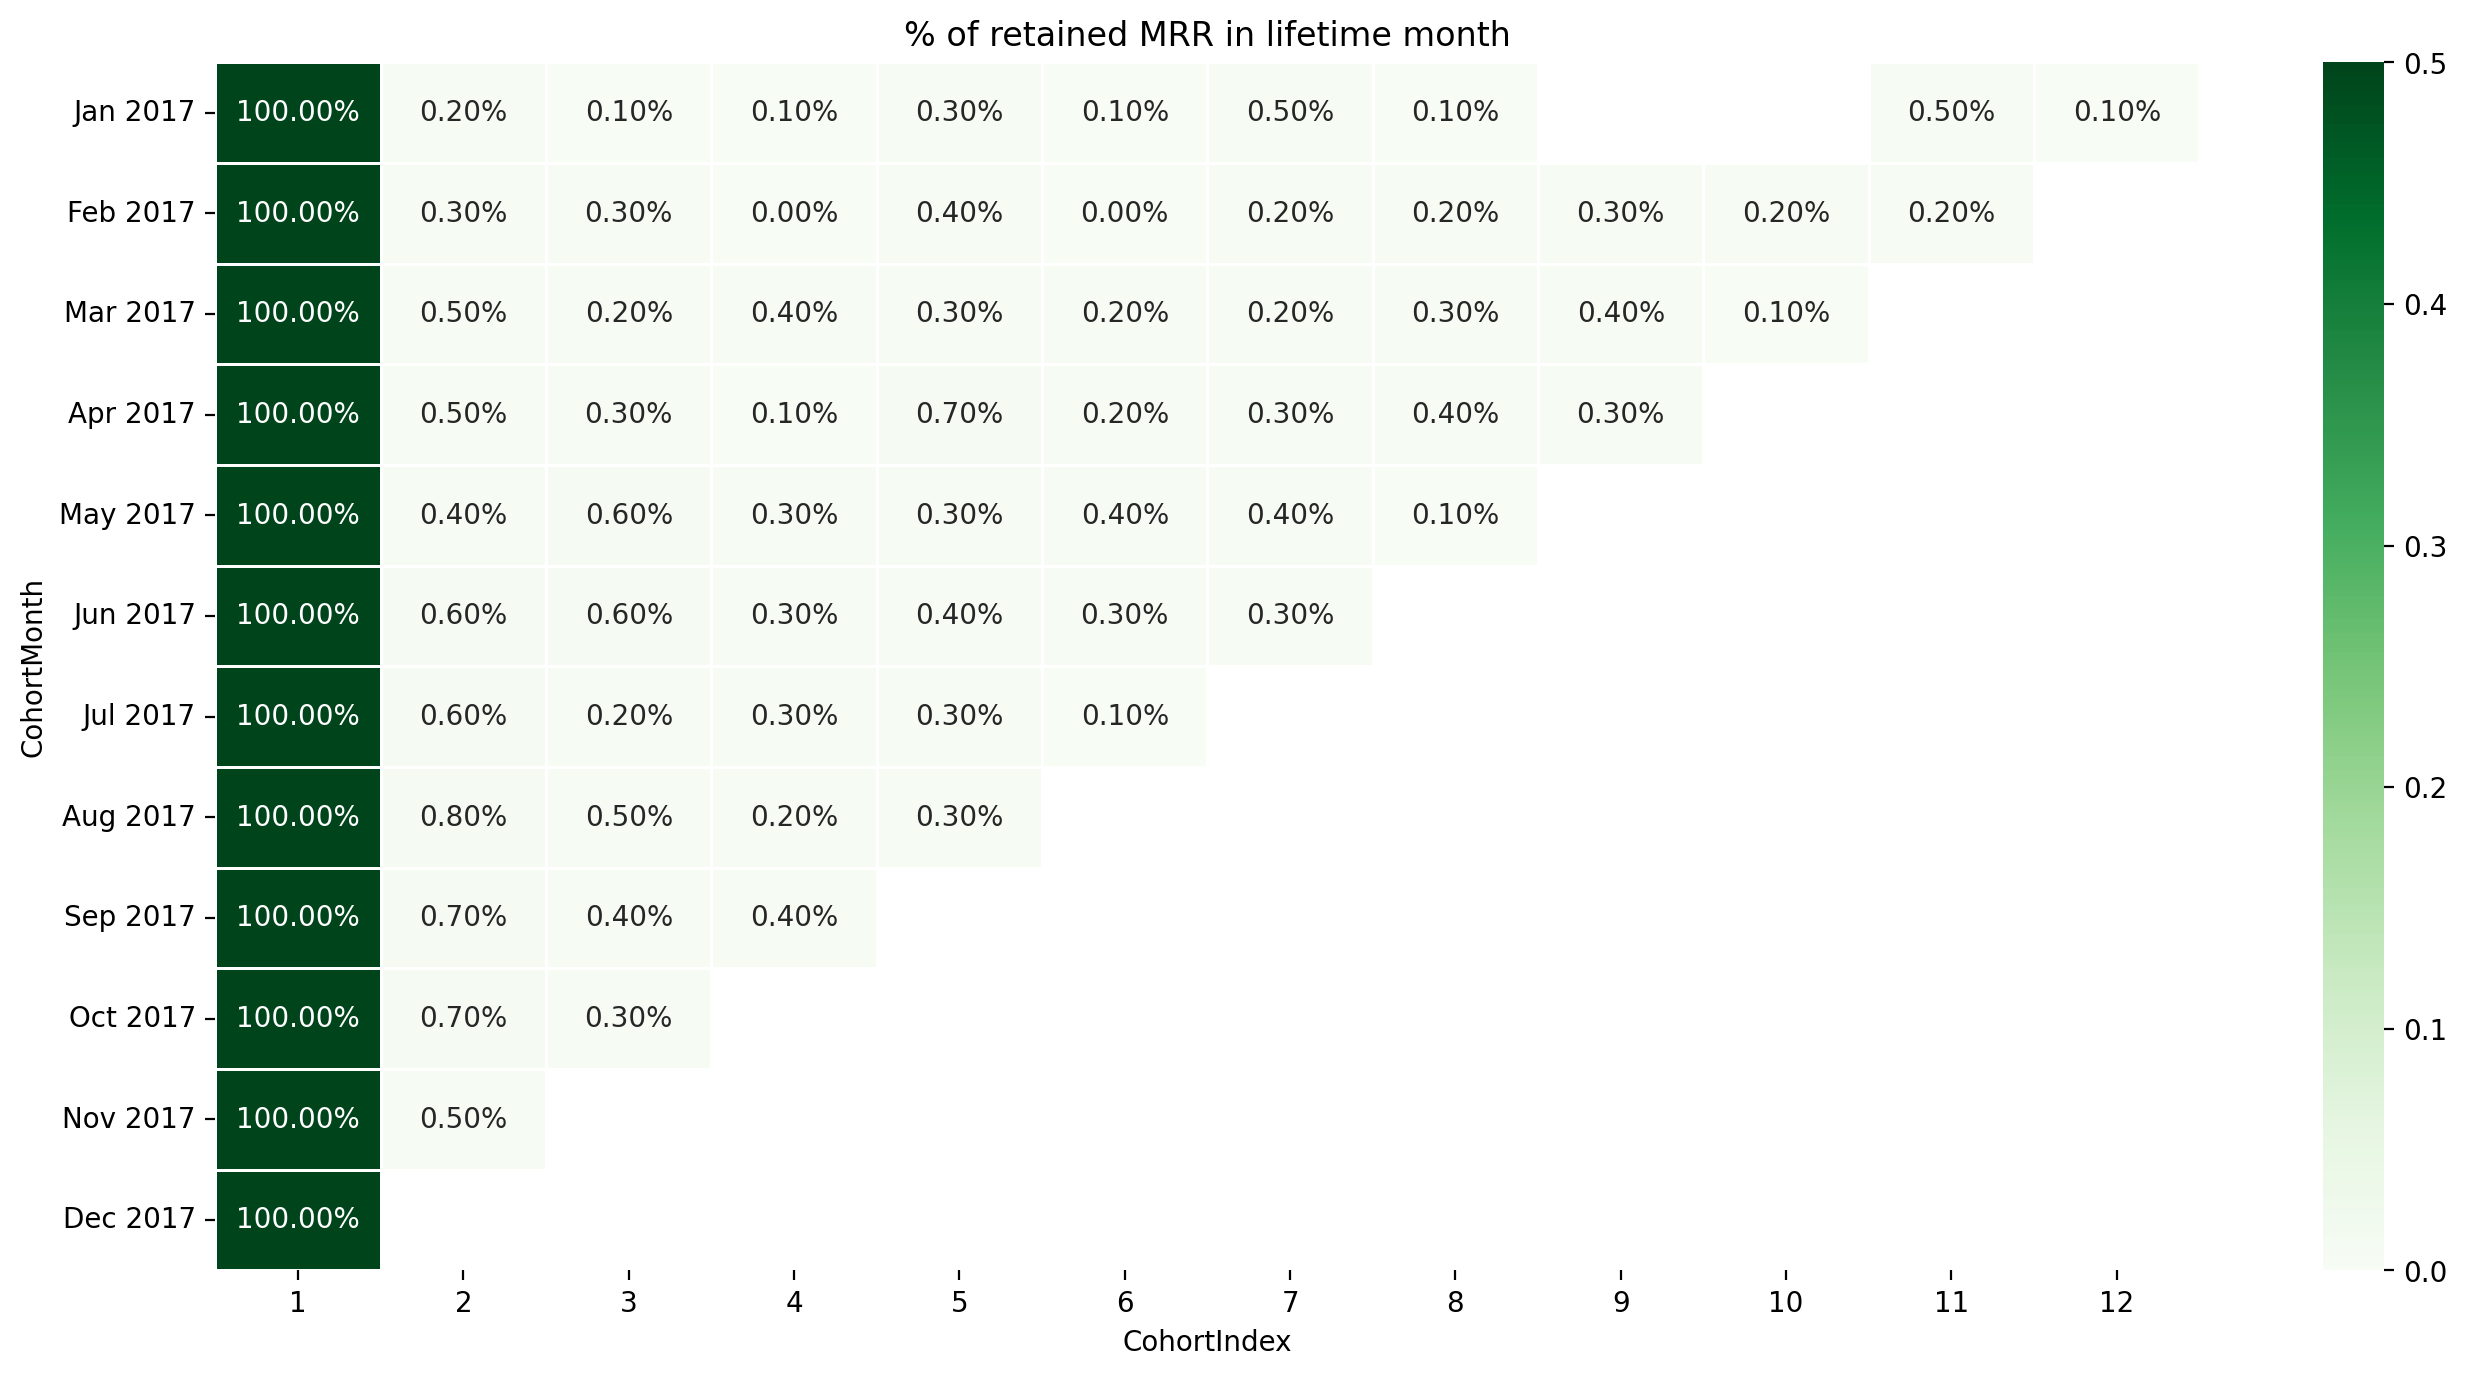

In [33]:
#Build the heatmap
plt.figure(figsize=(16,8), dpi=200)
plt.title('% of retained MRR in lifetime month')
sns.heatmap(data=mrr_per,annot = True, fmt = '.2%',vmin = 0.0,vmax = 0.5,cmap="Greens", linewidths=.5)
plt.show()

### 4. Time Between purchase

In [34]:
df1 = df[['order_id', 'order_purchase_timestamp', 'customer_unique_id']]
df1 = df1.drop_duplicates()
df1 = df1.sort_values(by=['customer_unique_id', 'order_purchase_timestamp'])

df1['diff'] = df1.groupby(['customer_unique_id'])['order_purchase_timestamp'].diff().dt.days.fillna(0)
ranks = df1.groupby('customer_unique_id')['order_purchase_timestamp'].rank(ascending = True, method = 'first')
ranks.name = 'rank'
df1 =  pd.concat([df1, ranks], axis = 1)
df1

order_id order_purchase_timestamp  \
21389  b33ec3b699337181488304f362a6b734      2017-03-10 21:05:03   
7534   41272756ecddd9a9ed0180413cc22fb6      2017-10-12 20:29:41   
7837   d957021f1127559cd947b62533f484f7      2017-11-14 19:45:42   
28307  ae76bef74b97bcb0b3e355e60d9a6f9c      2017-03-04 23:32:12   
17031  6681163e3dab91c549952b2845b20281      2017-07-18 09:23:10   
...                                 ...                      ...   
30026  4f8c4fa99a873ffb8452acc0e0c9c515      2017-10-30 20:39:50   
24116  1f5bb5f84797dd4e234479124128b9cc      2017-12-17 19:14:35   
13299  c71b9252fd7b3b263aaa4cb09319a323      2017-12-10 20:07:56   
5481   fdc45e6c7555e6cb3cc0daca2557dbe1      2017-02-07 15:49:16   
14493  f79a35da168301ae56922475da21117b      2017-05-02 20:18:45   

                     customer_unique_id  diff  rank  
21389  0000f46a3911fa3c0805444483337064   0.0   1.0  
7534   0000f6ccb0745a6a4b88665a16c9f078   0.0   1.0  
7837   0004aac84e0df4da2b147fca70cf8255   0.0   1.0  
28307  0005e1862207bf6ccc02e4228effd9a0   0.0   1.0  
17031  0006fdc98a402fceb4eb0ee528f6a8d4   0.0   1.0  
...                                 ...   ...   ...  
30026  fffa431dd3fcdefea4b1777d114144f2   0.0   1.0  
24116  fffb09418989a0dbff854a28163e47c6   0.0   1.0  
13299  fffea47cd6d3cc0a88bd621562a9d061   0.0   1.0  
5481   ffff371b4d645b6ecea244b27531430a   0.0   1.0  
14493  ffffd2657e2aad2907e67c3e9daecbeb   0.0   1.0  

[39224 rows x 5 columns]

In [35]:
df1 = df1[df1['rank'] > 1]
print(df1.shape)
df1.head()

(1145, 5)


order_id order_purchase_timestamp  \
16103  d61b915b69851aec8a8865f36cfd793e      2017-03-21 19:25:23   
25229  48d9d778ca005971949d2ccad7e99d70      2017-05-01 14:48:33   
28883  633bd8dd4d19125b69aeee2526f79779      2017-08-20 18:10:06   
28622  6e7e9fd0c7c9256e1119cbb95fd12bce      2017-12-26 21:14:43   
32557  9cf677fc6e42f8256b310109fe5f2333      2017-10-09 22:05:59   

                     customer_unique_id   diff  rank  
16103  00cc12a6d8b578b8ebd21ea4e2ae8b27    0.0   2.0  
25229  015557c9912277312b9073947804a7ba   38.0   2.0  
28883  018b5a7502c30eb5f230f1b4eb23a156   94.0   2.0  
28622  01c289bb06354cdc7e6549570f20ada4  206.0   2.0  
32557  02168ea18740a0fdaaa15f11bebba5db   50.0   2.0

In [36]:
#  AVG Time Between Purchase 
avg_time_between_purchase = round(df1['diff'].mean(), 2)

print(f'AVG Time Between Purchas {avg_time_between_purchase} days')

AVG Time Between Purchas 39.71 days


### 5. Loyal Customer Rate

In [37]:
loyal_data = df1.groupby('customer_unique_id').agg({'rank': 'max'})
loyal_data = loyal_data.groupby(['rank']).size().reset_index(name='count')
loyal_data = loyal_data.sort_values(by = ['count'], ascending = False)
loyal_data['rank'] = loyal_data['rank'].astype(int)
loyal_data['rank'] = loyal_data['rank'].astype(str)
loyal_data.head()

rank  count
0    2    972
1    3     58
2    4     11
3    5      3
4    6      1

In [38]:
loyal_data1 = loyal_data[loyal_data['rank'].astype(int) >= 2]
loyal_customer  = loyal_data1['count'].sum()
loyal_customer_rate = loyal_customer/ len(df['customer_unique_id'].unique())
loyal_customer_rate = round(loyal_customer_rate, 3)*100
print(f'Loyal Customer Rate {loyal_customer_rate}%' )

Loyal Customer Rate 2.7%


# More insights

## Customer and Revenue by Location


In [39]:
df_state = df.groupby(['customer_state']).agg({'customer_unique_id': pd.Series.nunique, 'order_id': pd.Series.nunique, 
                                               'total_amount': pd.Series.sum}).sort_values('total_amount', ascending = False)

# Rename columns
df_state.rename(columns = {'customer_unique_id': 'No_customers', 
                              'order_id' : 'No_orders', 
                              'total_amount' : 'Revenue'}, inplace = True)

# Sample
df_state.head()

No_customers  No_orders     Revenue
customer_state                                     
SP                     15521      15988  1798043.98
RJ                      5167       5323   662547.08
MG                      4649       4779   564808.79
RS                      2266       2341   283556.08
PR                      1939       2000   233381.58

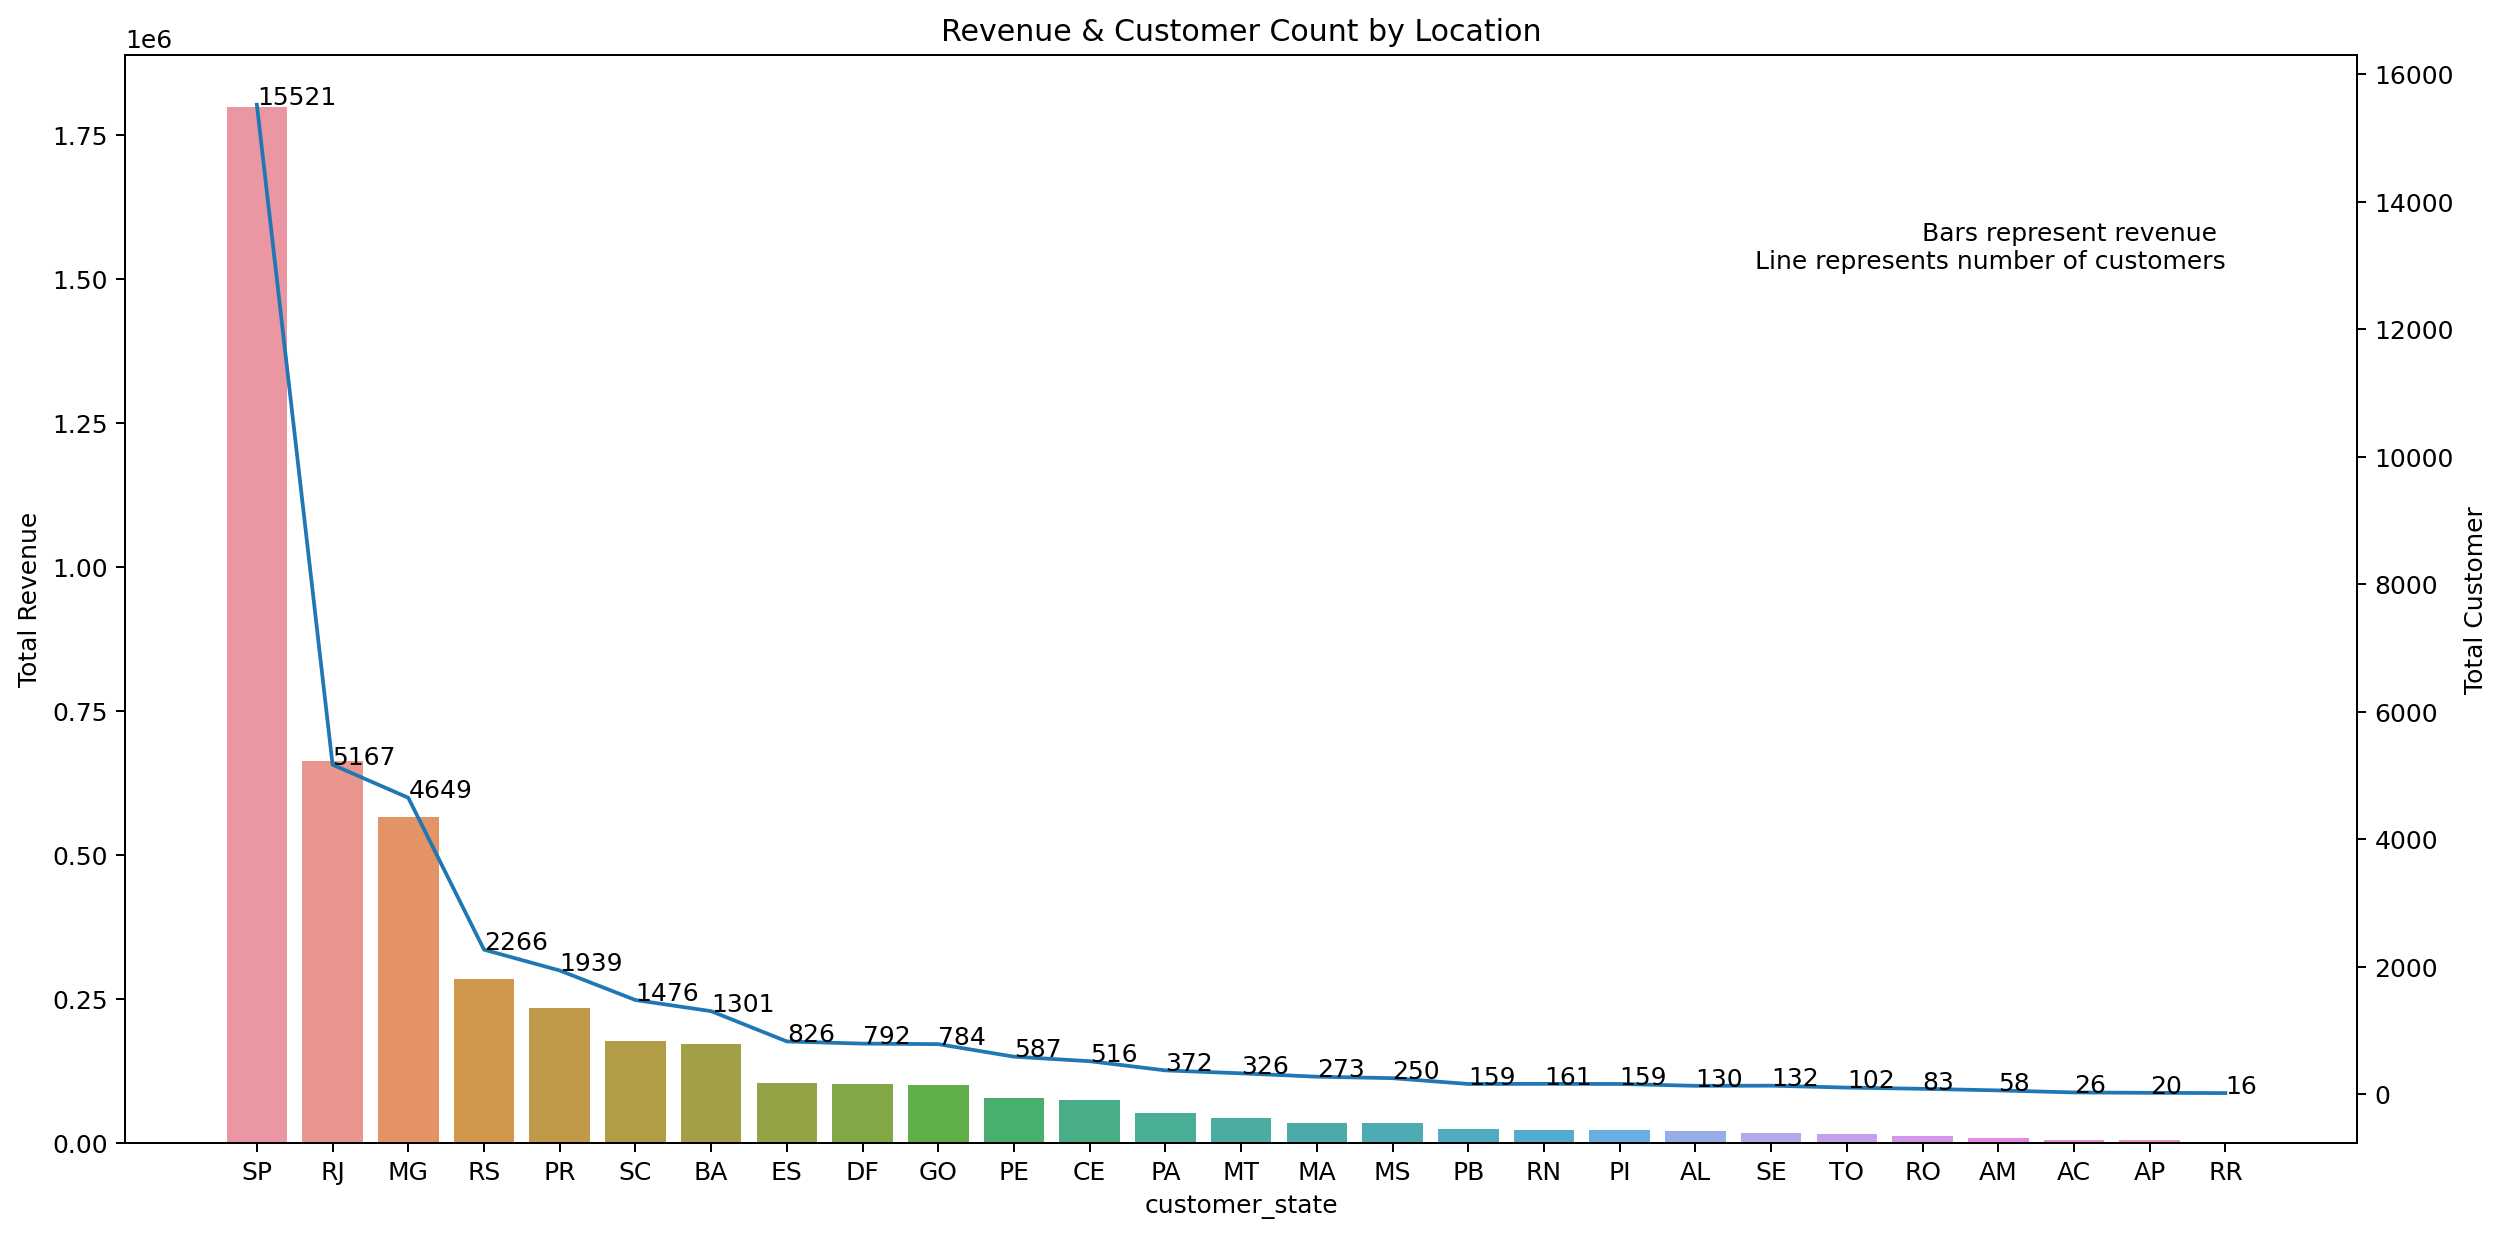

In [40]:
fig, ax = plt.subplots(figsize = (16, 8), dpi=180)

sns.barplot(x = df_state.index, y = df_state.Revenue, ax = ax)
ax2 = ax.twinx()
sns.lineplot(x = df_state.index, y = df_state.No_customers, ax = ax2)


ax2.set_ylabel("Total Customer")
ax.set_ylabel("Total Revenue")
plt.title("Revenue & Customer Count by Location")
ax.text(26, 1600000,"Bars represent revenue \nLine represents number of customers", 
        fontsize = 10, alpha = 1, horizontalalignment='right', verticalalignment='top')
for x, y in zip(df_state.index,  df_state.No_customers):
    ax2.text(x , y , y)


## Produits by category



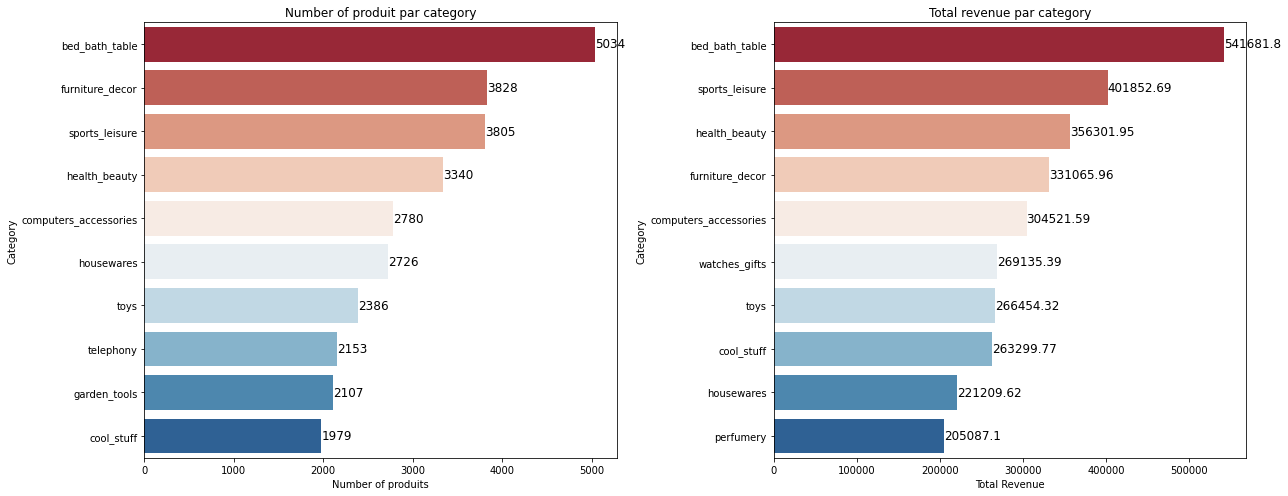

In [41]:
# Calculate the number of the produits and revenue
df_produit1 = df.groupby(["product_category"])['order_item_id'].count().sort_values(ascending=False).to_frame().reset_index()
df_produit1 = df_produit1[:10]

df_produit2 = df.groupby(["product_category"])['total_amount'].sum().sort_values(ascending=False).to_frame().reset_index()
df_produit2 = df_produit2[:10]


# Build the chart
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

bar_chart1 = sns.barplot(x='order_item_id', y='product_category', data=df_produit1, palette='RdBu', ax=axs[0])
bar_chart1.set_xlabel("Number of produits")
bar_chart1.set_ylabel("Category")
bar_chart1.set_title("Number of produit par category")
for x, y in zip(df_produit1['order_item_id'], df_produit1.index):
    bar_chart1.text(x+1, y, str(x), fontsize=12, color='black', va='center')

bar_chart2 = sns.barplot(x='total_amount', y='product_category', data=df_produit2, palette='RdBu', ax=axs[1])
bar_chart2.set_xlabel("Total Revenue")
bar_chart2.set_ylabel("Category")
bar_chart2.set_title("Total revenue par category")
for x, y in zip(round(df_produit2['total_amount'],2), df_produit2.index):
    bar_chart2.text(x+1, y, str(x), fontsize=12, color='black', va='center')
    
plt.tight_layout() # add some padding between subplots

plt.show()


### Distribution of review_score

<AxesSubplot: xlabel='review_score', ylabel='review_score'>

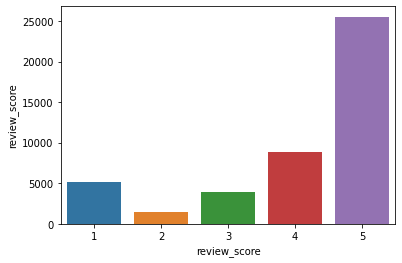

In [42]:
df_review = df.groupby(["review_score"])['review_score'].count().to_frame()
sns.barplot(x = df_review.index, y = df_review.review_score)